In [1]:
# Import a whole load of useful packages
import numpy as np 
import pandas as pd
from netCDF4 import Dataset
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio

In [2]:
import os.path
import re
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr
import glob
import itertools
from matplotlib.pyplot import cm
from matplotlib.ticker import LogFormatter
import matplotlib.colors
from scipy.interpolate import griddata 
from scipy.fft import fft, ifft, fft2, ifft2, fftshift, fftfreq
from scipy import signal
from scipy.optimize import minimize
kw = dict(origin='lower', aspect='auto') # Some standards for imshow plots

In [3]:
coastlineM = gpd.read_file("Coastline_Antarctica_v2.shp")
groundinglineM = gpd.read_file("Groundingline_Antarctica_v2.shp")
glacierlinesM = gpd.read_file("IceBoundaries_Antarctica_v2.shp")
Thwaites = glacierlinesM[glacierlinesM['Asso_Shelf']=='Thwaites']
PineIsland = glacierlinesM[(glacierlinesM['NAME']=='Pine_Island')&\
                           (glacierlinesM['Asso_Shelf']=='Pine_Island')]
Lakes = gpd.read_file("Thw_lakes_outlines.shp")
from shapely.geometry import Point, LineString, Polygon
poly = Polygon([(-1.318e6, -0.47e6), (-1.278e6, -0.463e6), \
                (-1.282e6, -0.442e6), (-1.320e6, -0.448e6)])
poly2 = Polygon([(-1.430e6, -0.47e6), (-1.385e6, -0.460e6), \
                (-1.395e6, -0.437e6), (-1.435e6, -0.445e6)])

In [4]:
# Sadly the Lakes shape files are in lat, long not polar stereo coords, so to convert them
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326","epsg:3031")
x0, y0 = transformer.transform(Lakes['geometry'][0].exterior.xy[1],Lakes['geometry'][0].exterior.xy[0])
x1, y1 = transformer.transform(Lakes['geometry'][1].exterior.xy[1],Lakes['geometry'][1].exterior.xy[0])
x2, y2 = transformer.transform(Lakes['geometry'][2].exterior.xy[1],Lakes['geometry'][2].exterior.xy[0])
x3, y3 = transformer.transform(Lakes['geometry'][3].exterior.xy[1],Lakes['geometry'][3].exterior.xy[0])

In [14]:
# Import the model ouput
# Grid 0 = -1.40e6 centre 
#filepath = r"output_1_200.nc"
filepath = r"output_1_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_1 = output.variables['x'][:]
Y_1 = output.variables['y'][:]
x_1, y_1 = np.meshgrid(X_1, Y_1)
bedmach_1 = output.variables['bedmach'][:,:]
bed_1 = output.variables['bed'][:,:]
errbed_1 = output.variables['errbed'][:,:]
slip_1 = output.variables['slip'][:,:]
errslip_1 = output.variables['errslip'][:,:]
output.close()

In [15]:
# Import the model ouput
# Grid 2 = -1.36e6 centre 
#filepath = r"output2.nc"
filepath = r"output_2_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_2 = output.variables['x'][:]
Y_2 = output.variables['y'][:]
x_2, y_2 = np.meshgrid(X_2, Y_2)
bedmach_2 = output.variables['bedmach'][:,:]
bed_2 = output.variables['bed'][:,:]
errbed_2 = output.variables['errbed'][:,:]
slip_2 = output.variables['slip'][:,:]
errslip_2 = output.variables['errslip'][:,:]
output.close()

In [16]:
# Import the model ouput
# Grid 3 = -1.32e6 centre 
#filepath = r"output3.nc"
filepath = r"output_3_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_3 = output.variables['x'][:]
Y_3 = output.variables['y'][:]
x_3, y_3 = np.meshgrid(X_3, Y_3)
bedmach_3 = output.variables['bedmach'][:,:]
bed_3 = output.variables['bed'][:,:]
errbed_3 = output.variables['errbed'][:,:]
slip_3 = output.variables['slip'][:,:]
errslip_3 = output.variables['errslip'][:,:]
output.close()

In [17]:
# Import the model ouput
# Grid 4 = -1.28e6 centre 
#filepath = r"output4.nc"
filepath = r"output_4_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_4 = output.variables['x'][:]
Y_4 = output.variables['y'][:]
x_4, y_4 = np.meshgrid(X_4, Y_4)
bedmach_4 = output.variables['bedmach'][:,:]
bed_4 = output.variables['bed'][:,:]
errbed_4 = output.variables['errbed'][:,:]
slip_4 = output.variables['slip'][:,:]
errslip_4 = output.variables['errslip'][:,:]
output.close()

In [18]:
# Import the model ouput
# Grid 5 = -1.24e6 centre 
#filepath = r"output5.nc"
filepath = r"output_5_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_5 = output.variables['x'][:]
Y_5 = output.variables['y'][:]
x_5, y_5 = np.meshgrid(X_5, Y_5)
bedmach_5 = output.variables['bedmach'][:,:]
bed_5 = output.variables['bed'][:,:]
errbed_5 = output.variables['errbed'][:,:]
slip_5 = output.variables['slip'][:,:]
errslip_5 = output.variables['errslip'][:,:]
output.close()

In [19]:
# Import the model ouput
# Grid 6 = -1.44e6 centre 
#filepath = r"output6.nc"
filepath = r"output_6_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_6 = output.variables['x'][:]
Y_6 = output.variables['y'][:]
x_6, y_6 = np.meshgrid(X_6, Y_6)
bedmach_6 = output.variables['bedmach'][:,:]
bed_6 = output.variables['bed'][:,:]
errbed_6 = output.variables['errbed'][:,:]
slip_6 = output.variables['slip'][:,:]
errslip_6 = output.variables['errslip'][:,:]
output.close()

In [22]:
# Import the model ouput
# Grid 6 = -1.44e6 centre 
#filepath = r"output7_nan.nc"
filepath = r"output_7_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_7 = output.variables['x'][:]
Y_7 = output.variables['y'][:]
x_7, y_7 = np.meshgrid(X_7, Y_7)
bedmach_7 = output.variables['bedmach'][:,:]
bed_7 = output.variables['bed'][:,:]
errbed_7 = output.variables['errbed'][:,:]
slip_7 = output.variables['slip'][:,:]
errslip_7 = output.variables['errslip'][:,:]
output.close()

In [23]:
# Import the model ouput
# Grid 8 = long top strip
#filepath = r"output8.nc"
filepath = r"output_8_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_8 = output.variables['x'][:]
Y_8 = output.variables['y'][:]
x_8, y_8 = np.meshgrid(X_8, Y_8)
bedmach_8 = output.variables['bedmach'][:,:]
bed_8 = output.variables['bed'][:,:]
errbed_8 = output.variables['errbed'][:,:]
slip_8 = output.variables['slip'][:,:]
errslip_8 = output.variables['errslip'][:,:]
output.close()

In [24]:
# Combine data to make just one array
x_coord = np.hstack((x_7, x_6, x_1, x_2, x_3, x_4, x_5))
y_coord = np.hstack((y_7, y_6, y_1, y_2, y_3, y_4, y_5))
bedmach = np.hstack((bedmach_7, bedmach_6, bedmach_1, bedmach_2, bedmach_3, bedmach_4, bedmach_5))
bed = np.hstack((bed_7, bed_6, bed_1, bed_2, bed_3, bed_4, bed_5))
errbed = np.hstack((errbed_7, errbed_6, errbed_1, errbed_2, errbed_3, errbed_4, errbed_5))
slip = np.hstack((slip_7, slip_6, slip_1, slip_2, slip_3, slip_4, slip_5))
errslip = np.hstack((errslip_7, errslip_6, errslip_1, errslip_2, errslip_3, errslip_4, errslip_5))

In [25]:
# Combine data to make just one array
x_coord_150 = np.vstack((x_8, x_coord))
y_coord_150 = np.vstack((y_8, y_coord))
bedmach_150 = np.vstack((bedmach_8, bedmach))
bed_150 = np.vstack((bed_8, bed))
errbed_150 = np.vstack((errbed_8, errbed))
slip_150 = np.vstack((slip_8, slip))
errslip_150 = np.vstack((errslip_8, errslip))

In [26]:
# Create some useful things from the data
poly_data = Polygon([(np.min(x_coord), np.min(y_coord)), (np.min(x_coord), np.max(y_coord)), \
                (np.max(x_coord), np.max(y_coord)), (np.max(x_coord), np.min(y_coord))])
edge = 3.75e4
poly_data2 = Polygon([(np.min(x_coord)-edge, np.min(y_coord)-edge), (np.min(x_coord)-edge, np.max(y_coord)+edge), \
                (np.max(x_coord)+edge, np.max(y_coord)+edge), (np.max(x_coord)+edge, np.min(y_coord)-edge)])

In [27]:
# Import the model ouput
# Grid 0 = -1.40e6 centre 
#filepath = r"output.nc"
filepath = r"output.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_1 = output.variables['x'][:]
Y_1 = output.variables['y'][:]
x_1, y_1 = np.meshgrid(X_1, Y_1)
bedmach_1 = output.variables['bedmach'][:,:]
bed_1 = output.variables['bed'][:,:]
errbed_1 = output.variables['errbed'][:,:]
slip_1 = output.variables['slip'][:,:]
errslip_1 = output.variables['errslip'][:,:]
output.close()

In [28]:
# Import the model ouput
# Grid 2 = -1.36e6 centre 
#filepath = r"output2.nc"
filepath = r"output2.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_2 = output.variables['x'][:]
Y_2 = output.variables['y'][:]
x_2, y_2 = np.meshgrid(X_2, Y_2)
bedmach_2 = output.variables['bedmach'][:,:]
bed_2 = output.variables['bed'][:,:]
errbed_2 = output.variables['errbed'][:,:]
slip_2 = output.variables['slip'][:,:]
errslip_2 = output.variables['errslip'][:,:]
output.close()

In [29]:
# Import the model ouput
# Grid 3 = -1.32e6 centre 
#filepath = r"output3.nc"
filepath = r"output3.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_3 = output.variables['x'][:]
Y_3 = output.variables['y'][:]
x_3, y_3 = np.meshgrid(X_3, Y_3)
bedmach_3 = output.variables['bedmach'][:,:]
bed_3 = output.variables['bed'][:,:]
errbed_3 = output.variables['errbed'][:,:]
slip_3 = output.variables['slip'][:,:]
errslip_3 = output.variables['errslip'][:,:]
output.close()

In [30]:
# Import the model ouput
# Grid 4 = -1.28e6 centre 
#filepath = r"output4.nc"
filepath = r"output4.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_4 = output.variables['x'][:]
Y_4 = output.variables['y'][:]
x_4, y_4 = np.meshgrid(X_4, Y_4)
bedmach_4 = output.variables['bedmach'][:,:]
bed_4 = output.variables['bed'][:,:]
errbed_4 = output.variables['errbed'][:,:]
slip_4 = output.variables['slip'][:,:]
errslip_4 = output.variables['errslip'][:,:]
output.close()

In [31]:
# Import the model ouput
# Grid 5 = -1.24e6 centre 
#filepath = r"output5.nc"
filepath = r"output5.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_5 = output.variables['x'][:]
Y_5 = output.variables['y'][:]
x_5, y_5 = np.meshgrid(X_5, Y_5)
bedmach_5 = output.variables['bedmach'][:,:]
bed_5 = output.variables['bed'][:,:]
errbed_5 = output.variables['errbed'][:,:]
slip_5 = output.variables['slip'][:,:]
errslip_5 = output.variables['errslip'][:,:]
output.close()

In [32]:
# Import the model ouput
# Grid 6 = -1.44e6 centre 
#filepath = r"output6.nc"
filepath = r"output6.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_6 = output.variables['x'][:]
Y_6 = output.variables['y'][:]
x_6, y_6 = np.meshgrid(X_6, Y_6)
bedmach_6 = output.variables['bedmach'][:,:]
bed_6 = output.variables['bed'][:,:]
errbed_6 = output.variables['errbed'][:,:]
slip_6 = output.variables['slip'][:,:]
errslip_6 = output.variables['errslip'][:,:]
output.close()

In [33]:
# Import the model ouput
# Grid 6 = -1.44e6 centre 
#filepath = r"output7_nan.nc"
filepath = r"output7.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_7 = output.variables['x'][:]
Y_7 = output.variables['y'][:]
x_7, y_7 = np.meshgrid(X_7, Y_7)
bedmach_7 = output.variables['bedmach'][:,:]
bed_7 = output.variables['bed'][:,:]
errbed_7 = output.variables['errbed'][:,:]
slip_7 = output.variables['slip'][:,:]
errslip_7 = output.variables['errslip'][:,:]
output.close()

In [34]:
# Import the model ouput
# Grid 8 = long top strip
#filepath = r"output8.nc"
filepath = r"output8.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_8 = output.variables['x'][:]
Y_8 = output.variables['y'][:]
x_8, y_8 = np.meshgrid(X_8, Y_8)
bedmach_8 = output.variables['bedmach'][:,:]
bed_8 = output.variables['bed'][:,:]
errbed_8 = output.variables['errbed'][:,:]
slip_8 = output.variables['slip'][:,:]
errslip_8 = output.variables['errslip'][:,:]
output.close()

In [35]:
# Combine data to make just one array
x_coord = np.hstack((x_7, x_6, x_1, x_2, x_3, x_4, x_5))
y_coord = np.hstack((y_7, y_6, y_1, y_2, y_3, y_4, y_5))
bedmach = np.hstack((bedmach_7, bedmach_6, bedmach_1, bedmach_2, bedmach_3, bedmach_4, bedmach_5))
bed = np.hstack((bed_7, bed_6, bed_1, bed_2, bed_3, bed_4, bed_5))
errbed = np.hstack((errbed_7, errbed_6, errbed_1, errbed_2, errbed_3, errbed_4, errbed_5))
slip = np.hstack((slip_7, slip_6, slip_1, slip_2, slip_3, slip_4, slip_5))
errslip = np.hstack((errslip_7, errslip_6, errslip_1, errslip_2, errslip_3, errslip_4, errslip_5))

In [36]:
# Combine data to make just one array
x_coord_100 = np.vstack((x_8, x_coord))
y_coord_100 = np.vstack((y_8, y_coord))
bedmach_100 = np.vstack((bedmach_8, bedmach))
bed_100 = np.vstack((bed_8, bed))
errbed_100 = np.vstack((errbed_8, errbed))
slip_100 = np.vstack((slip_8, slip))
errslip_100 = np.vstack((errslip_8, errslip))

In [37]:
from descartes import PolygonPatch

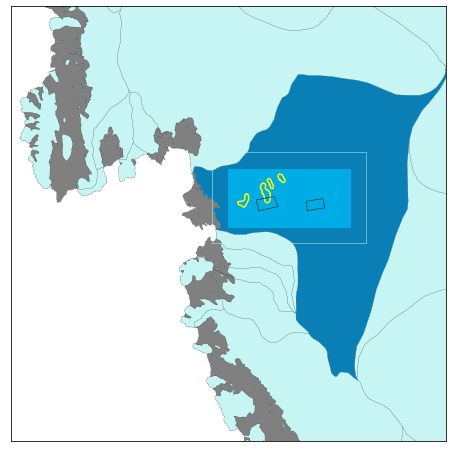

In [39]:
# Look at the region covered by the data
fig, ax = plt.subplots(1,1, figsize = (8,8))
coastlineM.plot(ax=ax, facecolor='grey')
groundinglineM.plot(ax=ax, facecolor='#c6f5f3')
glacierlinesM.plot(ax=ax, facecolor='none',edgecolor='k', linewidth=0.1)
Thwaites.plot(ax=ax, facecolor='#097fb5',edgecolor='none', linewidth=0.1)
plt.plot(*(x0,y0), color = '#ffff00')
plt.plot(*(x1,y1), color = '#ffff00')
plt.plot(*(x2,y2), color = '#ffff00')
plt.plot(*(x3,y3), color = '#ffff00')
plt.plot(*poly.exterior.xy, color='k', linewidth = 0.5)
plt.plot(*poly2.exterior.xy, color='k', linewidth = 0.5)
plt.plot(*poly_data2.exterior.xy, color = '#c6f5f3', linewidth = 0.5)
data_patch = PolygonPatch(poly_data, fc = '#00ace6', ec = '#00ace6')
ax.add_patch(data_patch)
plt.xlim(-2e6, -1e6)
plt.ylim(-1e6,0)
ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([]);
plt.savefig('Areacovered.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [40]:
errbed_min = 0 #np.min(errbed)
errbed_max = 200#np.max(errbed)
bed_min = np.min(bed)
bed_max = np.max(bed)
bedmach_min = np.min(bedmach)
bedmach_max = np.max(bedmach)
bedboth_min = -1800 #np.min((bed_min, bedmach_min))
bedboth_max = -650 #np.max((bed_max, bedmach_max))
diff_min = 0 # np.min(diff)
diff_max = 400 #np.max(diff) 
slip_min = 0 #np.min(slip)
slip_max = 300 #400 #np.max(slip)
errslip_min = np.min(errslip)
errslip_max = 60 # np.max(errslip)

In [41]:
# Comparing model output to the Holshuh grids

In [42]:
# Import the Lower Thwaites Radar grid
filepath = r"Radar_grid_lower_thwaites.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_lwt = output.variables['x'][:]
Y_lwt = output.variables['y'][:]
x_lwt, y_lwt = np.meshgrid(X_lwt, Y_lwt)
bed_lwt = output.variables['bed'][:,:]
output.close()

In [43]:
# Import the upper thwaites radar grid
filepath = r"Radar_grid_upper_thwaites.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_upt = output.variables['x'][:]
Y_upt = output.variables['y'][:]
x_upt, y_upt = np.meshgrid(X_upt, Y_upt)
bed_upt = output.variables['bed'][:,:]
output.close()

In [44]:
bounds = (x_upt.min(), x_upt.max(), y_upt.min(), y_upt.max())
xl2 = next(x for x, val in enumerate(x_coord_100[0,:]) if val >= bounds[0]) # X in ascending order
xh2 = next(x for x, val in enumerate(x_coord_100[0,:]) if val >= bounds[1])
yl2 = next(x for x, val in enumerate(y_coord_100[:,0]) if val <= bounds[2])  # Y in descending order
yh2 = next(x for x, val in enumerate(y_coord_100[:,0]) if val <= bounds[3])  

In [45]:
x_U150 = x_coord_150[yh2:yl2+1,xl2:xh2+1]
y_U150 = y_coord_150[yh2:yl2+1,xl2:xh2+1]
bed_Ua = bed_150[yh2:yl2+1,xl2:xh2+1]
std_Ua = errbed_150[yh2:yl2+1,xl2:xh2+1]

In [46]:
x_U100 = x_coord_100[yh2:yl2+1,xl2:xh2+1]
y_U100 = y_coord_100[yh2:yl2+1,xl2:xh2+1]
bed_Ub = bed_100[yh2:yl2+1,xl2:xh2+1]
std_Ub = errbed_100[yh2:yl2+1,xl2:xh2+1]

In [47]:
mask_U = ~np.isnan(bed_upt)
bed_U150 = bed_Ua.copy()
std_U150 = std_Ua.copy()
bed_U100 = bed_Ub.copy()
std_U100 = std_Ub.copy()
bed_U150[~mask_U] = np.nan
std_U150[~mask_U] = np.nan
bed_U100[~mask_U] = np.nan
std_U100[~mask_U] = np.nan

In [48]:
bounds = (x_lwt.min(), x_lwt.max(), y_lwt.min(), y_lwt.max())
xl2 = next(x for x, val in enumerate(x_coord_100[0,:]) if val >= bounds[0]) # X in ascending order
xh2 = next(x for x, val in enumerate(x_coord_100[0,:]) if val >= bounds[1])
yl2 = next(x for x, val in enumerate(y_coord_100[:,0]) if val <= bounds[2])  # Y in descending order
yh2 = next(x for x, val in enumerate(y_coord_100[:,0]) if val <= bounds[3])  

In [49]:
x_L150 = x_coord_150[yh2:yl2+1,xl2:xh2+1]
y_L150 = y_coord_150[yh2:yl2+1, xl2:xh2+1]
bed_La = bed_150[yh2:yl2+1, xl2:xh2+1]
std_La = errbed_150[yh2:yl2+1, xl2:xh2+1]

In [50]:
x_L100 = x_coord_100[yh2:yl2+1,xl2:xh2+1]
y_L100 = y_coord_100[yh2:yl2+1, xl2:xh2+1]
bed_Lb = bed_100[yh2:yl2+1, xl2:xh2+1]
std_Lb = errbed_100[yh2:yl2+1, xl2:xh2+1]

In [51]:
mask_L = ~np.isnan(bed_lwt)
bed_L150 = bed_La.copy()
std_L150 = std_La.copy()
bed_L100 = bed_Lb.copy()
std_L100 = std_Lb.copy()
bed_L150[~mask_L] = np.nan
std_L150[~mask_L] = np.nan
bed_L100[~mask_L] = np.nan
std_L100[~mask_L] = np.nan

In [52]:
from scipy import stats
def regr_coef(x,y):
    x_here = np.ndarray.flatten(x.real)
    y_here = np.ndarray.flatten(y.real)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_here,y_here)
    return slope, intercept, r_value

In [53]:
slope_U100, intercept_U100, r_value_U100 = regr_coef(bed_upt[mask_U], bed_U100[mask_U])
slope_U150, intercept_U150, r_value_U150 = regr_coef(bed_upt[mask_U], bed_U150[mask_U])
slope_L100, intercept_L100, r_value_L100 = regr_coef(bed_lwt[mask_L], bed_L100[mask_L])
slope_L150, intercept_L150, r_value_L150 = regr_coef(bed_lwt[mask_L], bed_L150[mask_L])

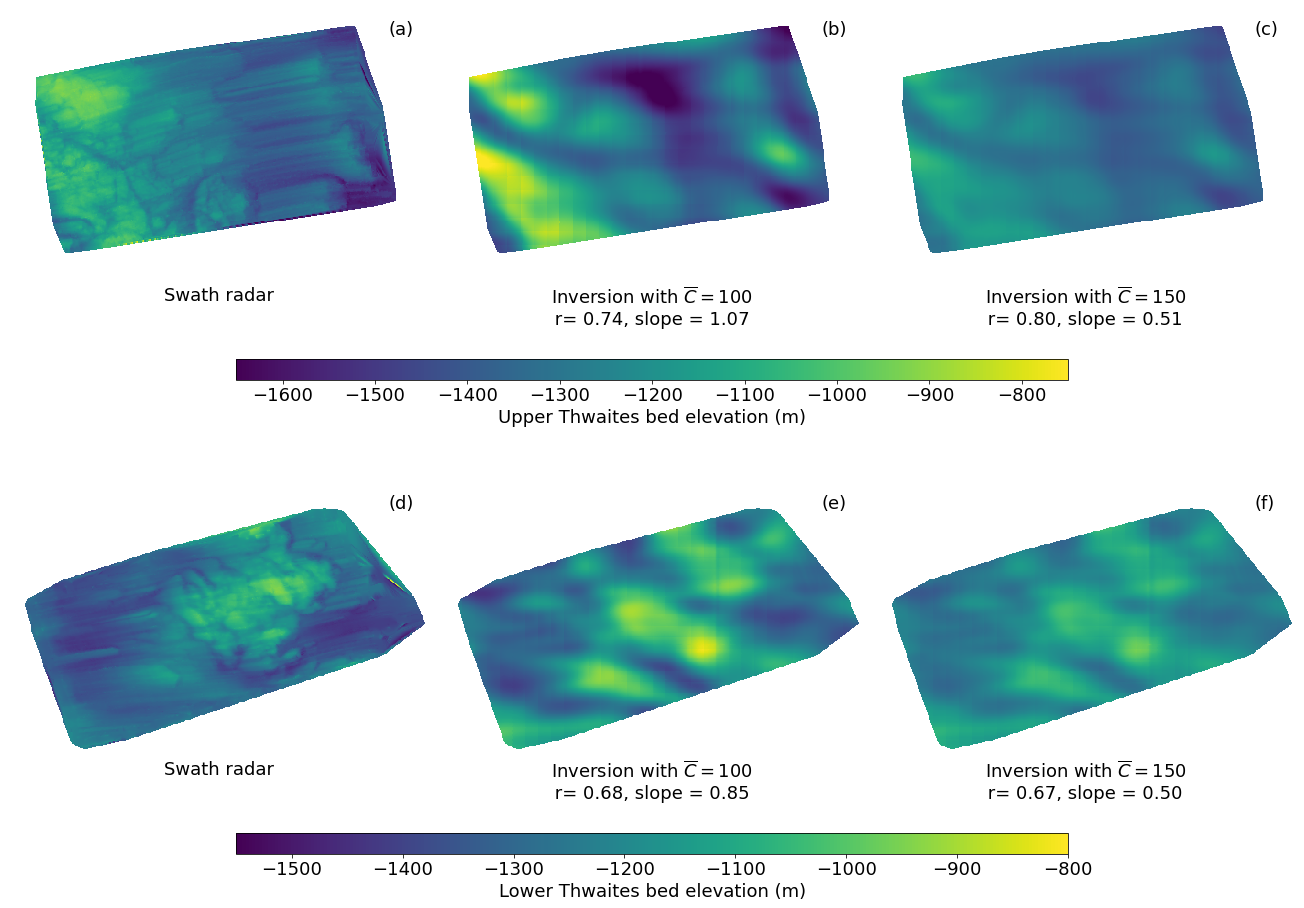

In [54]:
ax = [[[],[],[]], \
     [[],[],[]], \
     [[],[],[]], \
     [[],[],[]]]
fig = plt.figure(constrained_layout=True, figsize = (18,12.5))
heights = [4,0.3, 0.5, 4,0.3]
gs = fig.add_gridspec(5,6, height_ratios = heights)
ax[0][0] = fig.add_subplot(gs[0, 0:2])
#ax[1][0] = fig.add_subplot(gs[1, 0])
ax[2][0] = fig.add_subplot(gs[3, 0:2])
#ax[3][0] = fig.add_subplot(gs[4, 0])
ax[0][1] = fig.add_subplot(gs[0, 2:4])
ax[1][1] = fig.add_subplot(gs[1, 1:5])
ax[2][1] = fig.add_subplot(gs[3, 2:4])
ax[3][1] = fig.add_subplot(gs[4, 1:5])
ax[0][2] = fig.add_subplot(gs[0, 4:6])
#ax[1][2] = fig.add_subplot(gs[1, 2])
ax[2][2] = fig.add_subplot(gs[3, 4:6])
#ax[3][2] = fig.add_subplot(gs[4, 2])

im = [[[],[],[]], \
     [[],[],[]]]
xs = [[x_upt, x_upt, x_upt],\
      [x_lwt, x_lwt, x_lwt]]
ys = [[y_upt, y_upt, y_upt],\
      [y_lwt, y_lwt, y_lwt]]
plts = [[bed_upt, bed_U100, bed_U150], \
       [bed_lwt, bed_L100, bed_L150]]
sub_labels = [['(a)','(b)','(c)'],['(d)','(e)','(f)']]
titles = [['Swath radar',
          r'Inversion with $\overline{{C}} = 100$' \
           '\n r= {:.2f}, slope = {:.2f} \n'.format(r_value_U100, slope_U100), \
          r'Inversion with $\overline{{C}} = 150$' \
           '\n r= {:.2f}, slope = {:.2f} \n'.format(r_value_U150, slope_U150)], \
          ['Swath radar',
          r'Inversion with $\overline{{C}} = 100$' \
           '\n r= {:.2f}, slope = {:.2f} \n'.format(r_value_L100, slope_L100), \
          r'Inversion with $\overline{{C}} = 150$' \
           '\n r= {:.2f}, slope = {:.2f} \n'.format(r_value_L150, slope_L150)]]
#    r'$log_{10} (\lambda / \overline{h} )$'
for j in range(3):
    im[0][j] = ax[0][j].pcolor(xs[0][j], ys[0][j], plts[0][j])
    im[1][j] = ax[2][j].pcolor(xs[1][j], ys[1][j], plts[1][j])
    ax[0][j].get_xaxis().set_ticks([]); ax[0][j].get_yaxis().set_ticks([]);
    ax[2][j].get_xaxis().set_ticks([]); ax[2][j].get_yaxis().set_ticks([]);
    im[0][j].set_clim(-1650,-750)
    im[1][j].set_clim(-1550,-800)
    ax[0][j].set_frame_on(False)
    ax[2][j].set_frame_on(False)
    ax[0][j].set_xlabel(titles[0][j], fontsize = 18)
    ax[2][j].set_xlabel(titles[1][j], fontsize = 18)
    ax[0][j].annotate(sub_labels[0][j], xy = (0.90,0.90), xycoords = 'axes fraction', fontsize = 18)
    ax[2][j].annotate(sub_labels[1][j], xy = (0.90,0.90), xycoords = 'axes fraction', fontsize = 18)
    
cb0 = plt.colorbar(im[0][0], cax = ax[1][1], orientation = 'horizontal', shrink = 0.8)
cb1 = plt.colorbar(im[1][0], cax = ax[3][1], orientation = 'horizontal')
for t in cb0.ax.get_xticklabels():
         t.set_fontsize(18)
for t in cb1.ax.get_xticklabels():
         t.set_fontsize(18)
cb0.set_label('Upper Thwaites bed elevation (m)', fontsize = 18)
cb1.set_label('Lower Thwaites bed elevation (m)', fontsize = 18)

plt.savefig('Swath_withC.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
plt.savefig('Swath_withC.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [55]:
# Comparison to the PASIN radar lines

In [56]:
PASIN = pd.read_csv('Thwaites_19_20_PASIN_radar_V2.1.csv')
x = PASIN['x']
y = PASIN['y']
BedPick = PASIN['BedPick']
BedElev = PASIN['BedElev']
T05 = PASIN['FlightID'] == 'T05'
T09 = PASIN['FlightID'] == 'T09'
T10 = PASIN['FlightID'] == 'T10'
T11 = PASIN['FlightID'] == 'T11'
T12 = PASIN['FlightID'] == 'T12'
T13 = PASIN['FlightID'] == 'T13'
T14 = PASIN['FlightID'] == 'T14'

In [57]:
x_09 = PASIN[T09]['x']
y_09 = PASIN[T09]['y']
be_09 = PASIN[T09]['BedElev']
x_10 = PASIN[T10]['x']
y_10 = PASIN[T10]['y']
be_10 = PASIN[T10]['BedElev']
x_10_grid = x_10 < -1220107.5
x_09_grid = x_09 > -1499947.5
x_91a = np.hstack((x_09[x_09_grid][5310:], x_10[x_10_grid][:8442][1050:]))
y_91a = np.hstack((y_09[x_09_grid][5310:], y_10[x_10_grid][:8442][1050:]))
be_91a = np.hstack((be_09[x_09_grid][5310:], be_10[x_10_grid][:8442][1050:]))
x_91b = np.hstack((x_10[x_10_grid][8442:], x_09[x_09_grid][:5310][1300:]))
y_91b = np.hstack((y_10[x_10_grid][8442:], y_09[x_09_grid][:5310][1300:]))
be_91b = np.hstack((be_10[x_10_grid][8442:], be_09[x_09_grid][:5310][1300:]))

In [75]:
x_12 = PASIN[T12]['x']
y_12 = PASIN[T12]['y']
be_12 = PASIN[T12]['BedElev']
y_12_grid = y_12 < -346852.5
y_12_gri2 = y_12[y_12_grid] > -506572.5
b = 3188
c = 10612
d = 16722
x_12a = x_12[y_12_grid][y_12_gri2][b:c]
y_12a = y_12[y_12_grid][y_12_gri2][b:c]
be_12a = be_12[y_12_grid][y_12_gri2][b:c]
x_12b = x_12[y_12_grid][y_12_gri2][c:d]
y_12b = y_12[y_12_grid][y_12_gri2][c:d]
be_12b = be_12[y_12_grid][y_12_gri2][c:d]

In [76]:
x_11 = PASIN[T11]['x']
y_11 = PASIN[T11]['y']
be_11 = PASIN[T11]['BedElev']
y_11_grid = y_11 < -346852.5
y_11_gri2 = y_11[y_11_grid] > -506572.5
b = 1800
c = 4162
d = 12107
e = 16000
x_11a = np.hstack((x_11[y_11_grid][y_11_gri2][d:e], x_11[y_11_grid][y_11_gri2][b:c]))
y_11a = np.hstack((y_11[y_11_grid][y_11_gri2][d:e], y_11[y_11_grid][y_11_gri2][b:c]))
be_11a = np.hstack((be_11[y_11_grid][y_11_gri2][d:e], be_11[y_11_grid][y_11_gri2][b:c]))
x_11b = x_11[y_11_grid][y_11_gri2][c:d]
y_11b = y_11[y_11_grid][y_11_gri2][c:d]
be_11b = be_11[y_11_grid][y_11_gri2][c:d]

In [77]:
x_13 = PASIN[T13]['x']
y_13 = PASIN[T13]['y']
be_13 = PASIN[T13]['BedElev']
y_13_grid = y_13 < -346852.5
y_13_gri2 = y_13[y_13_grid] > -506572.5
a = 500
b = 5199
c = 11801
d = 19739
z = 680
x_132 = np.hstack((np.flip(x_13[y_13_grid][y_13_gri2][a:b]), x_12[y_12_grid][y_12_gri2][z:3188]))
y_132 = np.hstack((np.flip(y_13[y_13_grid][y_13_gri2][a:b]), y_12[y_12_grid][y_12_gri2][z:3188]))
be_132 = np.hstack((np.flip(be_13[y_13_grid][y_13_gri2][a:b]), be_12[y_12_grid][y_12_gri2][z:3188]))
x_13a = x_13[y_13_grid][y_13_gri2][b:c]
y_13a = y_13[y_13_grid][y_13_gri2][b:c]
be_13a = be_13[y_13_grid][y_13_gri2][b:c]
x_13b = x_13[y_13_grid][y_13_gri2][c:d]
y_13b = y_13[y_13_grid][y_13_gri2][c:d]
be_13b = be_13[y_13_grid][y_13_gri2][c:d]

In [58]:
def freq_filter(bed, x, y, wave_cut):
    x_int = np.arange(x.min()+10, x.max(), 25)
    be_int = griddata((x[~np.isnan(bed)]),bed[~np.isnan(bed)],(x_int), method = 'cubic')
    y_int = griddata((x[~np.isnan(bed)]),y[~np.isnan(bed)],(x_int), method = 'cubic')
    grad = (be_int[0]- be_int[be_int.shape[0]-1])/(x_int[0]-x_int[x_int.shape[0]-1])
    slope = np.arange(0,len(x_int)*25,25) * grad
    wave_int = 1/np.abs(fftfreq(len(be_int), 25))
    wave_int_mask = wave_int < wave_cut
    be_fft = fft(be_int-slope)
    be_fft[wave_int_mask] = 0
    return x_int, y_int, ifft(be_fft).real+slope

def fft_smooth(array, wave_cut):
    grad = (array[0]- array[array.shape[0]-1])/(-(array.shape[0]-1)*25)
    slope = np.arange(0,len(array)*25,25) * grad
    wave_int = 1/np.abs(fftfreq(len(array), 25))
    wave_int_mask = wave_int < wave_cut
    be_fft = fft(array-slope)
    be_fft[wave_int_mask] = 0
    be_ifft = ifft(be_fft).real + slope
    return be_ifft

from scipy import stats
def regr_coe2f(x,y):
    x_here = x
    y_here = y
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_here,y_here)
    return slope, intercept, r_value

In [59]:
filt_wave = 2000

In [60]:
x_int_91b_v1, y_int_91b_v1, be_int_91b_v1 = freq_filter(be_91b, x_91b, y_91b, filt_wave)
x_int_91a_v1, y_int_91a_v1, be_int_91a_v1 = freq_filter(be_91a, x_91a, y_91a, filt_wave)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [61]:
array_limit_a_200 = 260 # = 0 for C = 100
array_limit_b_200 = 550 # = 0 for C = 100
x_int_91a = x_int_91a_v1[array_limit_a_200:]
y_int_91a = y_int_91a_v1[array_limit_a_200:]
be_int_91a = be_int_91a_v1[array_limit_a_200:]
x_int_91b = x_int_91b_v1[52:][array_limit_b_200:]
y_int_91b = y_int_91b_v1[52:][array_limit_b_200:]
be_int_91b = be_int_91b_v1[52:][array_limit_b_200:]

In [62]:
x_flat = x_coord_100.flatten()
y_flat = y_coord_100.flatten()
bedmach_flat = bedmach_100.flatten()
bed_flat_100 = bed_100.flatten()
errbed_flat_100 = errbed_100.flatten()
bed_flat_150 = bed_150.flatten()
errbed_flat_150 = errbed_150.flatten()

In [63]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100

In [64]:
Bedmach_91a = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_91a,y_int_91a), method = 'cubic')

In [65]:
Bed_91a_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_91a,y_int_91a), method = 'cubic')

In [66]:
Errbed_91a_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_91a,y_int_91a), method = 'cubic')

In [67]:
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150

In [68]:
Bed_91a_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_91a,y_int_91a), method = 'cubic')

In [69]:
Errbed_91a_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_91a,y_int_91a), method = 'cubic')

In [70]:
Bedmach_int_91a = fft_smooth(Bedmach_91a, filt_wave)
Bed_int_91a_100 = fft_smooth(Bed_91a_100, filt_wave)
Bed_int_91a_150 = fft_smooth(Bed_91a_150, filt_wave)
Errbed_int_91a_100 = fft_smooth(Errbed_91a_100, filt_wave)
Errbed_int_91a_150 = fft_smooth(Errbed_91a_150, filt_wave)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [71]:
be_91a_reg = be_int_91a[~np.isnan(be_int_91a)][~np.isnan((Bed_91a_100[~np.isnan(be_int_91a)]))]
Bedmach_91a_reg = Bedmach_int_91a[~np.isnan(be_int_91a)][~np.isnan((Bed_91a_100[~np.isnan(be_int_91a)]))]

Bed_91a_100_reg = Bed_int_91a_100[~np.isnan(be_int_91a)][~np.isnan((Bed_91a_100[~np.isnan(be_int_91a)]))]
Bed_91a_150_reg = Bed_int_91a_150[~np.isnan(be_int_91a)][~np.isnan((Bed_91a_150[~np.isnan(be_int_91a)]))]

In [72]:
slope_Bed_91a_100, intercept_Bed_91a_100, r_value_Bed_91a_100 = regr_coe2f(Bed_91a_100_reg, be_91a_reg)
slope_Bed_91a_150, intercept_Bed_91a_150, r_value_Bed_91a_150 = regr_coe2f(Bed_91a_150_reg, be_91a_reg)
slope_BMach_91a, intercept_BMach_91a, r_value_BMach_91a = regr_coe2f(Bedmach_91a_reg, be_91a_reg)

In [73]:
slope_Bed_91a_100, slope_Bed_91a_150, r_value_Bed_91a_100, r_value_Bed_91a_150

(0.6520617124147234, 0.8045456647948828, 0.8535271675997075, 0.859628105357805)

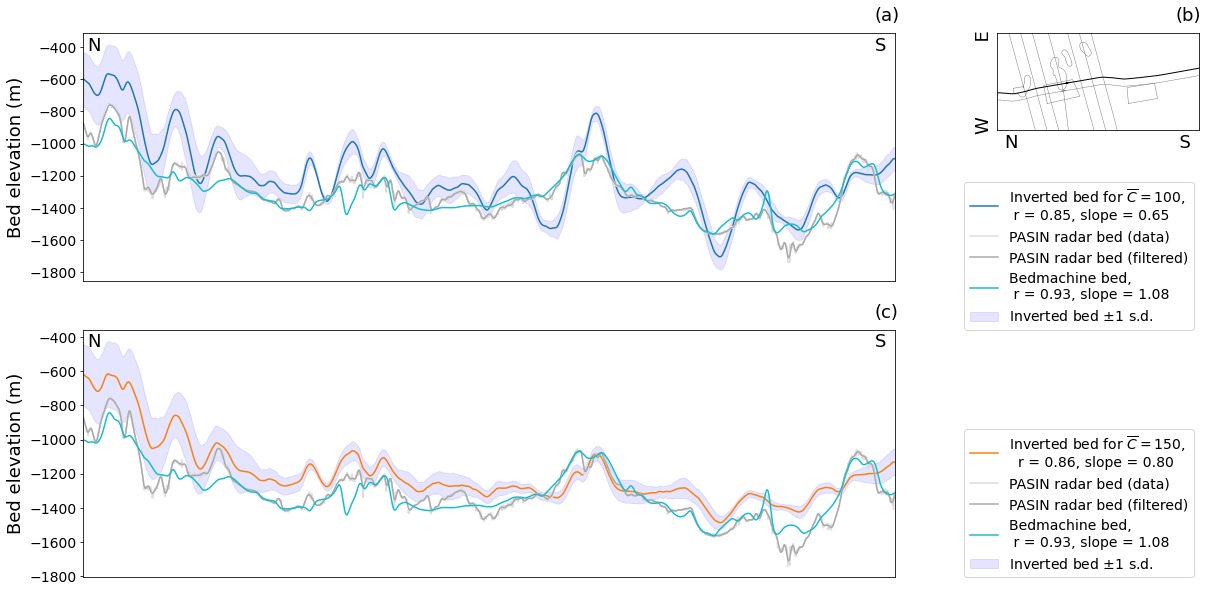

In [78]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(x_int_91a, Bed_int_91a_100-Errbed_int_91a_100, \
                   Bed_int_91a_100+Errbed_int_91a_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(x_int_91a, Bed_int_91a_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_91a_100, slope_Bed_91a_100))
ax[0,0].plot(x_91a, be_91a, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(x_int_91a, be_int_91a, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(x_int_91a, Bedmach_int_91a, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_91a, slope_BMach_91a))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(x_int_91a.min(), x_int_91a.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('N', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('S', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(x_int_91a, Bed_int_91a_150-Errbed_int_91a_150, \
                   Bed_int_91a_150+Errbed_int_91a_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(x_int_91a, Bed_int_91a_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_91a_150, slope_Bed_91a_150))
ax[1,0].plot(x_91a, be_91a, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(x_int_91a, be_int_91a, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(x_int_91a, Bedmach_int_91a, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_91a, slope_BMach_91a))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(x_int_91a.min(), x_int_91a.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('N', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('S', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 1, c= 'k', zorder = 100)
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
plt.savefig('Flight_line_91a_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
plt.savefig('Flight_line_91a_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [ ]:
y_13b_r = y_13b[~np.isnan(be_13b)].reset_index()['y']
x_13b_r = x_13b[~np.isnan(be_13b)].reset_index()['x']
be_13b_r = be_13b[~np.isnan(be_13b)].reset_index()['BedElev']
y_int = np.arange(y_13b_r.max(), y_13b_r.min()+10, -25)
x_int = griddata((y_13b_r), x_13b_r,(y_int), method = 'cubic')
be_int = griddata((y_13b_r), be_13b_r,(y_int), method = 'cubic')
grad = (be_int[0]- be_int[be_int.shape[0]-1])/(y_int[0]-y_int[y_int.shape[0]-1])
slope = np.arange(0,len(y_int)*25,25) * grad
wave_int = 1/np.abs(fftfreq(len(be_int), 25))
wave_int_mask = wave_int < filt_wave
be_fft = fft(be_int-slope)
be_fft[wave_int_mask] = 0
be_ifft = ifft(be_fft).real + slope
x_int_13b, y_int_13b, be_int_13b = x_int, y_int, be_ifft

In [ ]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100
Bedmach_13b = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_13b,y_int_13b), method = 'cubic')
Bed_13b_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_13b,y_int_13b), method = 'cubic')
Errbed_13b_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_13b,y_int_13b), method = 'cubic')
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150
Bed_13b_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_13b,y_int_13b), method = 'cubic')
Errbed_13b_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_13b,y_int_13b), method = 'cubic')

In [ ]:
Bedmach_int_13b = fft_smooth(Bedmach_13b, filt_wave)
Bed_int_13b_100 = fft_smooth(Bed_13b_100, filt_wave)
Bed_int_13b_150 = fft_smooth(Bed_13b_150, filt_wave)
Errbed_int_13b_100 = fft_smooth(Errbed_13b_100, filt_wave)
Errbed_int_13b_150 = fft_smooth(Errbed_13b_150, filt_wave)

Bed_13b_100_reg = Bed_int_13b_100[~np.isnan(be_int_13b)][~np.isnan((Bed_13b_100[~np.isnan(be_int_13b)]))]
Bed_13b_150_reg = Bed_int_13b_150[~np.isnan(be_int_13b)][~np.isnan((Bed_13b_150[~np.isnan(be_int_13b)]))]
be_13b_reg = be_int_13b[~np.isnan(be_int_13b)][~np.isnan((Bed_13b_100[~np.isnan(be_int_13b)]))]
Bedmach_13b_reg = Bedmach_int_13b[~np.isnan(be_int_13b)][~np.isnan((Bed_13b_100[~np.isnan(be_int_13b)]))]

slope_Bed_13b_100, intercept_Bed_13b_100, r_value_Bed_13b_100 = regr_coe2f(Bed_13b_100_reg, be_13b_reg)
slope_Bed_13b_150, intercept_Bed_13b_150, r_value_Bed_13b_150 = regr_coe2f(Bed_13b_150_reg, be_13b_reg)
slope_BMach_13b, intercept_BMach_13b, r_value_BMach_13b = regr_coe2f(Bedmach_13b_reg, be_13b_reg)

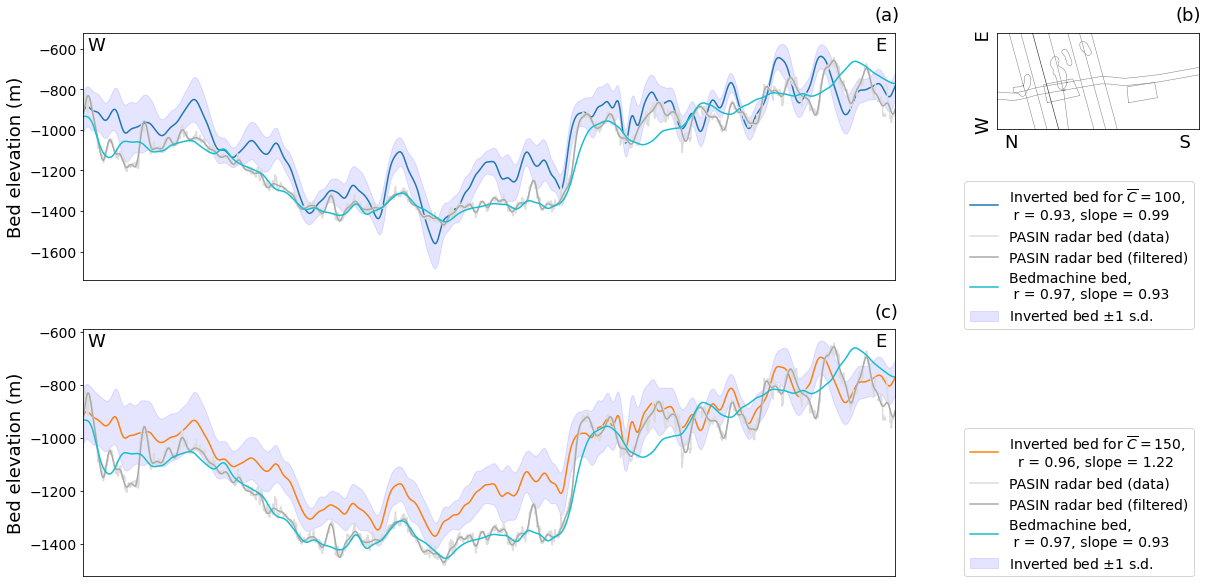

In [103]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(y_int_13b, Bed_int_13b_100-Errbed_int_13b_100, \
                   Bed_int_13b_100+Errbed_int_13b_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(y_int_13b, Bed_int_13b_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_13b_100, slope_Bed_13b_100))
ax[0,0].plot(y_13b, be_13b, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(y_int_13b, be_int_13b, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(y_int_13b, Bedmach_int_13b, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_13b, slope_BMach_13b))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(y_int_13b.min(), y_int_13b.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(y_int_13b, Bed_int_13b_150-Errbed_int_13b_150, \
                   Bed_int_13b_150+Errbed_int_13b_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(y_int_13b, Bed_int_13b_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_13b_150, slope_Bed_13b_150))
ax[1,0].plot(y_13b, be_13b, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(y_int_13b, be_int_13b, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(y_int_13b, Bedmach_int_13b, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_13b, slope_BMach_13b))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(y_int_13b.min(), y_int_13b.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'k', zorder = 100)
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
plt.savefig('Flight_line_13b_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
plt.savefig('Flight_line_13b_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [ ]:
# Looking at the other radar lines 

In [79]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100
Bedmach_91b = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_91b,y_int_91b), method = 'cubic')
Bed_91b_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_91b,y_int_91b), method = 'cubic')
Errbed_91b_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_91b,y_int_91b), method = 'cubic')
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150
Bed_91b_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_91b,y_int_91b), method = 'cubic')
Errbed_91b_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_91b,y_int_91b), method = 'cubic')

In [108]:
Bedmach_int_91b = fft_smooth(Bedmach_91b, filt_wave)
Bed_int_91b_100 = fft_smooth(Bed_91b_100, filt_wave)
Bed_int_91b_150 = fft_smooth(Bed_91b_150, filt_wave)
Errbed_int_91b_100 = fft_smooth(Errbed_91b_100, filt_wave)
Errbed_int_91b_150 = fft_smooth(Errbed_91b_150, filt_wave)

Bed_91b_100_reg = Bed_int_91b_100[~np.isnan(be_int_91b)][~np.isnan((Bed_91b_100[~np.isnan(be_int_91b)]))]
Bed_91b_150_reg = Bed_int_91b_150[~np.isnan(be_int_91b)][~np.isnan((Bed_91b_150[~np.isnan(be_int_91b)]))]
be_91b_reg = be_int_91b[~np.isnan(be_int_91b)][~np.isnan((Bed_91b_100[~np.isnan(be_int_91b)]))]
Bedmach_91b_reg = Bedmach_int_91b[~np.isnan(be_int_91b)][~np.isnan((Bed_91b_100[~np.isnan(be_int_91b)]))]

slope_Bed_91b_100, intercept_Bed_91b_100, r_value_Bed_91b_100 = regr_coe2f(Bed_91b_100_reg, be_91b_reg)
slope_Bed_91b_150, intercept_Bed_91b_150, r_value_Bed_91b_150 = regr_coe2f(Bed_91b_150_reg, be_91b_reg)
slope_BMach_91b, intercept_BMach_91b, r_value_BMach_91b = regr_coe2f(Bedmach_91b_reg, be_91b_reg)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


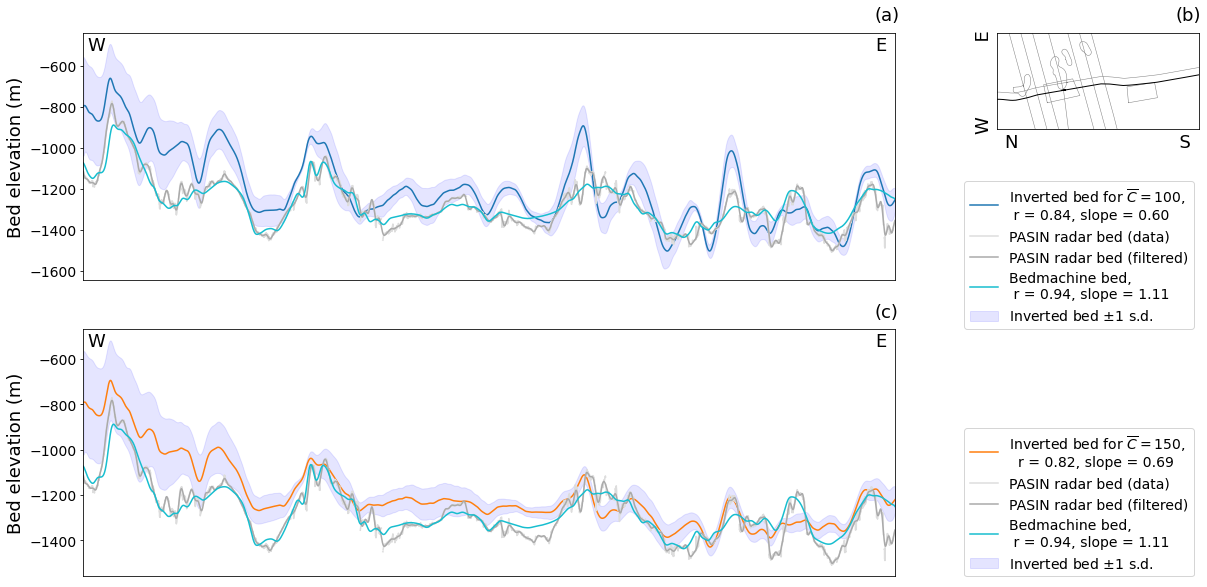

In [120]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(x_int_91b, Bed_int_91b_100-Errbed_int_91b_100, \
                   Bed_int_91b_100+Errbed_int_91b_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(x_int_91b, Bed_int_91b_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_91b_100, slope_Bed_91b_100))
ax[0,0].plot(x_91b, be_91b, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(x_int_91b, be_int_91b, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(x_int_91b, Bedmach_int_91b, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_91b, slope_BMach_91b))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(x_int_91b.min(), x_int_91b.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('N', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('S', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(x_int_91b, Bed_int_91b_150-Errbed_int_91b_150, \
                   Bed_int_91b_150+Errbed_int_91b_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(x_int_91b, Bed_int_91b_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_91b_150, slope_Bed_91b_150))
ax[1,0].plot(x_91b, be_91b, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(x_int_91b, be_int_91b, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(x_int_91b, Bedmach_int_91b, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_91b, slope_BMach_91b))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(x_int_91b.min(), x_int_91b.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('N', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('S', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 1, c= 'k', zorder = 100)
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
#plt.savefig('Flight_line_13b_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
#plt.savefig('Flight_line_13b_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [122]:
y_12b_r = y_12b[~np.isnan(be_12b)].reset_index()['y']
x_12b_r = x_12b[~np.isnan(be_12b)].reset_index()['x']
be_12b_r = be_12b[~np.isnan(be_12b)].reset_index()['BedElev']
y_int = np.arange(y_12b_r.max(), y_12b_r.min()+10, -25)
x_int = griddata((y_12b_r), x_12b_r,(y_int), method = 'cubic')
be_int = griddata((y_12b_r), be_12b_r,(y_int), method = 'cubic')
grad = (be_int[0]- be_int[be_int.shape[0]-1])/(y_int[0]-y_int[y_int.shape[0]-1])
slope = np.arange(0,len(y_int)*25,25) * grad
wave_int = 1/np.abs(fftfreq(len(be_int), 25))
wave_int_mask = wave_int < filt_wave
be_fft = fft(be_int-slope)
be_fft[wave_int_mask] = 0
be_ifft = ifft(be_fft).real + slope
x_int_12b, y_int_12b, be_int_12b = x_int, y_int, be_ifft

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [123]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100
Bedmach_12b = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_12b,y_int_12b), method = 'cubic')
Bed_12b_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_12b,y_int_12b), method = 'cubic')
Errbed_12b_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_12b,y_int_12b), method = 'cubic')
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150
Bed_12b_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_12b,y_int_12b), method = 'cubic')
Errbed_12b_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_12b,y_int_12b), method = 'cubic')

In [124]:
Bedmach_int_12b = fft_smooth(Bedmach_12b, filt_wave)
Bed_int_12b_100 = fft_smooth(Bed_12b_100, filt_wave)
Bed_int_12b_150 = fft_smooth(Bed_12b_150, filt_wave)
Errbed_int_12b_100 = fft_smooth(Errbed_12b_100, filt_wave)
Errbed_int_12b_150 = fft_smooth(Errbed_12b_150, filt_wave)

Bed_12b_100_reg = Bed_int_12b_100[~np.isnan(be_int_12b)][~np.isnan((Bed_12b_100[~np.isnan(be_int_12b)]))]
Bed_12b_150_reg = Bed_int_12b_150[~np.isnan(be_int_12b)][~np.isnan((Bed_12b_150[~np.isnan(be_int_12b)]))]
be_12b_reg = be_int_12b[~np.isnan(be_int_12b)][~np.isnan((Bed_12b_100[~np.isnan(be_int_12b)]))]
Bedmach_12b_reg = Bedmach_int_12b[~np.isnan(be_int_12b)][~np.isnan((Bed_12b_100[~np.isnan(be_int_12b)]))]

slope_Bed_12b_100, intercept_Bed_12b_100, r_value_Bed_12b_100 = regr_coe2f(Bed_12b_100_reg, be_12b_reg)
slope_Bed_12b_150, intercept_Bed_12b_150, r_value_Bed_12b_150 = regr_coe2f(Bed_12b_150_reg, be_12b_reg)
slope_BMach_12b, intercept_BMach_12b, r_value_BMach_12b = regr_coe2f(Bedmach_12b_reg, be_12b_reg)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


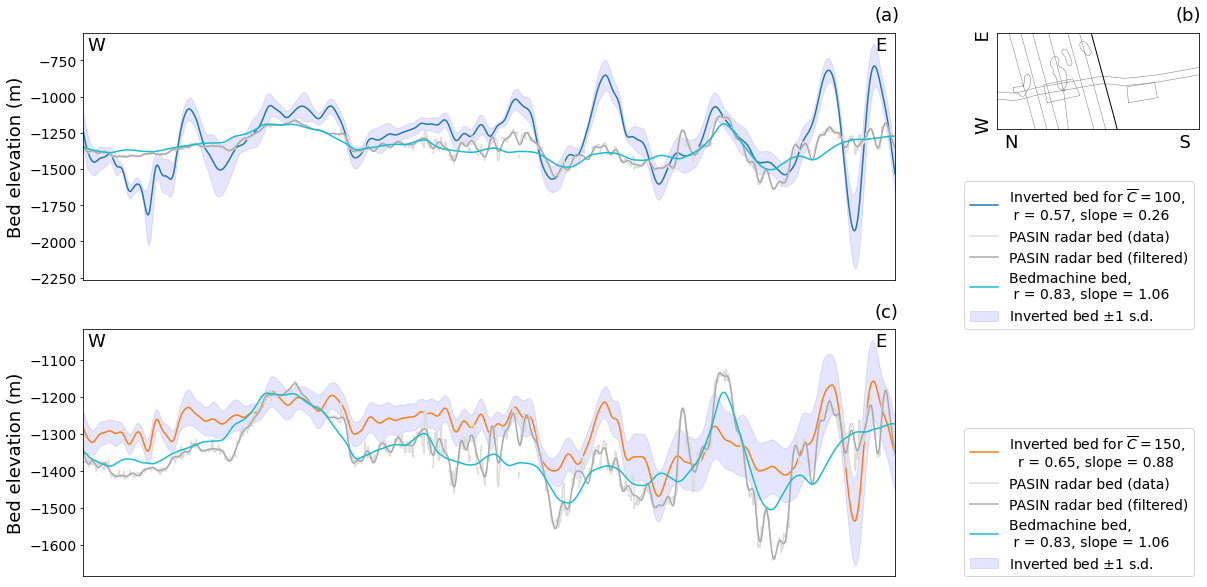

In [126]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(y_int_12b, Bed_int_12b_100-Errbed_int_12b_100, \
                   Bed_int_12b_100+Errbed_int_12b_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(y_int_12b, Bed_int_12b_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_12b_100, slope_Bed_12b_100))
ax[0,0].plot(y_12b, be_12b, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(y_int_12b, be_int_12b, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(y_int_12b, Bedmach_int_12b, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_12b, slope_BMach_12b))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(y_int_12b.min(), y_int_12b.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(y_int_12b, Bed_int_12b_150-Errbed_int_12b_150, \
                   Bed_int_12b_150+Errbed_int_12b_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(y_int_12b, Bed_int_12b_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_12b_150, slope_Bed_12b_150))
ax[1,0].plot(y_12b, be_12b, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(y_int_12b, be_int_12b, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(y_int_12b, Bedmach_int_12b, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_12b, slope_BMach_12b))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(y_int_12b.min(), y_int_12b.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 1, c= 'k', zorder = 100)
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
#plt.savefig('Flight_line_13b_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
#plt.savefig('Flight_line_13b_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [127]:
y_12a_r = y_12a[~np.isnan(be_12a)].reset_index()['y']
x_12a_r = x_12a[~np.isnan(be_12a)].reset_index()['x']
be_12a_r = be_12a[~np.isnan(be_12a)].reset_index()['BedElev']
y_int = np.arange(y_12a_r.max(), y_12a_r.min()+10, -25)
x_int = griddata((y_12a_r), x_12a_r,(y_int), method = 'cubic')
be_int = griddata((y_12a_r), be_12a_r,(y_int), method = 'cubic')
grad = (be_int[0]- be_int[be_int.shape[0]-1])/(y_int[0]-y_int[y_int.shape[0]-1])
slope = np.arange(0,len(y_int)*25,25) * grad
wave_int = 1/np.abs(fftfreq(len(be_int), 25))
wave_int_mask = wave_int < filt_wave
be_fft = fft(be_int-slope)
be_fft[wave_int_mask] = 0
be_ifft = ifft(be_fft).real + slope
x_int_12a, y_int_12a, be_int_12a = x_int, y_int, be_ifft

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [128]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100
Bedmach_12a = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_12a,y_int_12a), method = 'cubic')
Bed_12a_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_12a,y_int_12a), method = 'cubic')
Errbed_12a_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_12a,y_int_12a), method = 'cubic')
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150
Bed_12a_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_12a,y_int_12a), method = 'cubic')
Errbed_12a_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_12a,y_int_12a), method = 'cubic')

In [129]:
Bedmach_int_12a = fft_smooth(Bedmach_12a, filt_wave)
Bed_int_12a_100 = fft_smooth(Bed_12a_100, filt_wave)
Bed_int_12a_150 = fft_smooth(Bed_12a_150, filt_wave)
Errbed_int_12a_100 = fft_smooth(Errbed_12a_100, filt_wave)
Errbed_int_12a_150 = fft_smooth(Errbed_12a_150, filt_wave)

Bed_12a_100_reg = Bed_int_12a_100[~np.isnan(be_int_12a)][~np.isnan((Bed_12a_100[~np.isnan(be_int_12a)]))]
Bed_12a_150_reg = Bed_int_12a_150[~np.isnan(be_int_12a)][~np.isnan((Bed_12a_150[~np.isnan(be_int_12a)]))]
be_12a_reg = be_int_12a[~np.isnan(be_int_12a)][~np.isnan((Bed_12a_100[~np.isnan(be_int_12a)]))]
Bedmach_12a_reg = Bedmach_int_12a[~np.isnan(be_int_12a)][~np.isnan((Bed_12a_100[~np.isnan(be_int_12a)]))]

slope_Bed_12a_100, intercept_Bed_12a_100, r_value_Bed_12a_100 = regr_coe2f(Bed_12a_100_reg, be_12a_reg)
slope_Bed_12a_150, intercept_Bed_12a_150, r_value_Bed_12a_150 = regr_coe2f(Bed_12a_150_reg, be_12a_reg)
slope_BMach_12a, intercept_BMach_12a, r_value_BMach_12a = regr_coe2f(Bedmach_12a_reg, be_12a_reg)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


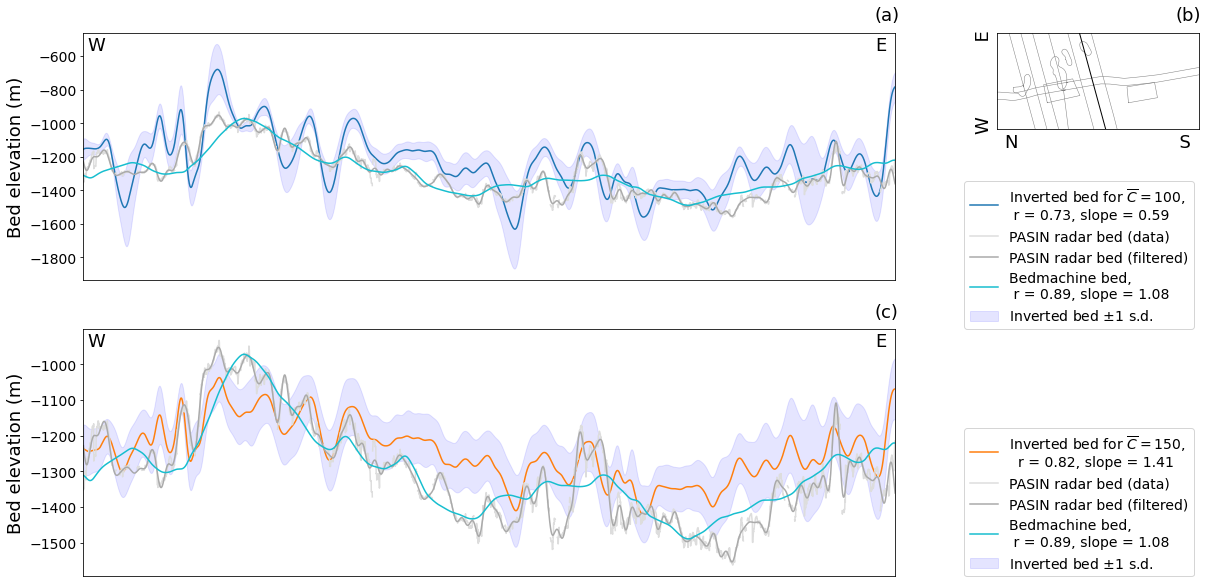

In [130]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(y_int_12a, Bed_int_12a_100-Errbed_int_12a_100, \
                   Bed_int_12a_100+Errbed_int_12a_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(y_int_12a, Bed_int_12a_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_12a_100, slope_Bed_12a_100))
ax[0,0].plot(y_12a, be_12a, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(y_int_12a, be_int_12a, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(y_int_12a, Bedmach_int_12a, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_12a, slope_BMach_12a))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(y_int_12a.min(), y_int_12a.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(y_int_12a, Bed_int_12a_150-Errbed_int_12a_150, \
                   Bed_int_12a_150+Errbed_int_12a_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(y_int_12a, Bed_int_12a_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_12a_150, slope_Bed_12a_150))
ax[1,0].plot(y_12a, be_12a, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(y_int_12a, be_int_12a, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(y_int_12a, Bedmach_int_12a, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_12a, slope_BMach_12a))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(y_int_12a.min(), y_int_12a.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 1, c= 'k', zorder = 100)
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
#plt.savefig('Flight_line_13b_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
#plt.savefig('Flight_line_13b_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [131]:
y_11a_r = y_11a[~np.isnan(be_11a)]#.reset_index()['y']
x_11a_r = x_11a[~np.isnan(be_11a)]#.reset_index()['x']
be_11a_r = be_11a[~np.isnan(be_11a)]#.reset_index()['BedElev']
y_int = np.arange(y_11a_r.max(), y_11a_r.min()+10, -25)
x_int = griddata((y_11a_r), x_11a_r,(y_int), method = 'cubic')
be_int = griddata((y_11a_r), be_11a_r,(y_int), method = 'cubic')
grad = (be_int[0]- be_int[be_int.shape[0]-1])/(y_int[0]-y_int[y_int.shape[0]-1])
slope = np.arange(0,len(y_int)*25,25) * grad
wave_int = 1/np.abs(fftfreq(len(be_int), 25))
wave_int_mask = wave_int < filt_wave
be_fft = fft(be_int-slope)
be_fft[wave_int_mask] = 0
be_ifft = ifft(be_fft).real + slope
x_int_11a, y_int_11a, be_int_11a = x_int, y_int, be_ifft

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [132]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100
Bedmach_11a = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_11a,y_int_11a), method = 'cubic')
Bed_11a_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_11a,y_int_11a), method = 'cubic')
Errbed_11a_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_11a,y_int_11a), method = 'cubic')
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150
Bed_11a_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_11a,y_int_11a), method = 'cubic')
Errbed_11a_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_11a,y_int_11a), method = 'cubic')

In [133]:
Bedmach_int_11a = fft_smooth(Bedmach_11a, filt_wave)
Bed_int_11a_100 = fft_smooth(Bed_11a_100, filt_wave)
Bed_int_11a_150 = fft_smooth(Bed_11a_150, filt_wave)
Errbed_int_11a_100 = fft_smooth(Errbed_11a_100, filt_wave)
Errbed_int_11a_150 = fft_smooth(Errbed_11a_150, filt_wave)

Bed_11a_100_reg = Bed_int_11a_100[~np.isnan(be_int_11a)][~np.isnan((Bed_11a_100[~np.isnan(be_int_11a)]))]
Bed_11a_150_reg = Bed_int_11a_150[~np.isnan(be_int_11a)][~np.isnan((Bed_11a_150[~np.isnan(be_int_11a)]))]
be_11a_reg = be_int_11a[~np.isnan(be_int_11a)][~np.isnan((Bed_11a_100[~np.isnan(be_int_11a)]))]
Bedmach_11a_reg = Bedmach_int_11a[~np.isnan(be_int_11a)][~np.isnan((Bed_11a_100[~np.isnan(be_int_11a)]))]

slope_Bed_11a_100, intercept_Bed_11a_100, r_value_Bed_11a_100 = regr_coe2f(Bed_11a_100_reg, be_11a_reg)
slope_Bed_11a_150, intercept_Bed_11a_150, r_value_Bed_11a_150 = regr_coe2f(Bed_11a_150_reg, be_11a_reg)
slope_BMach_11a, intercept_BMach_11a, r_value_BMach_11a = regr_coe2f(Bedmach_11a_reg, be_11a_reg)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


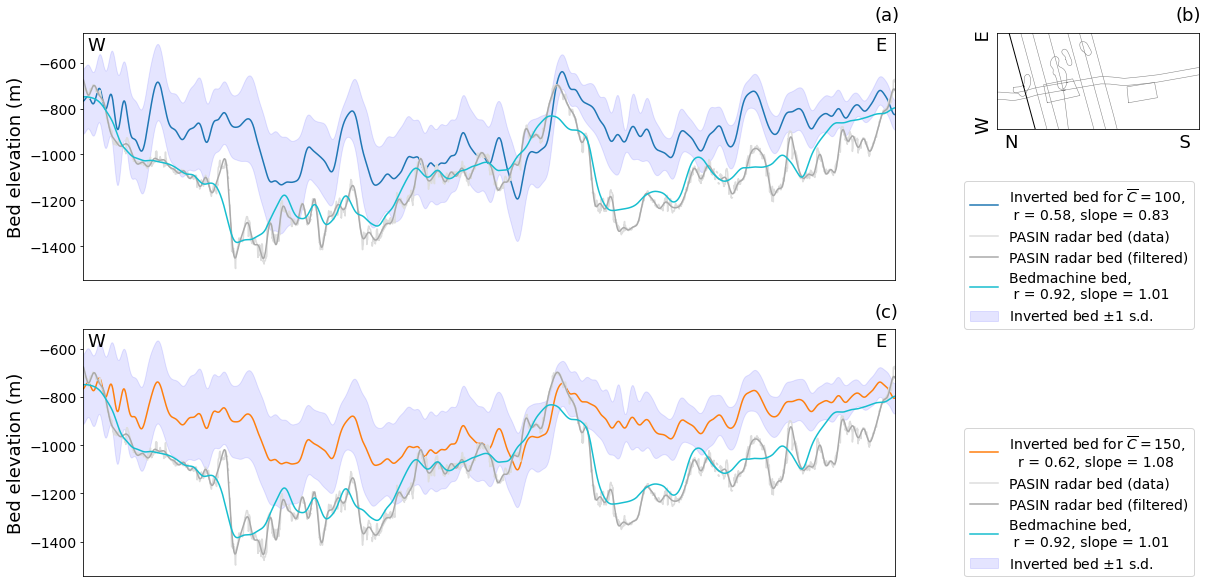

In [134]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(y_int_11a, Bed_int_11a_100-Errbed_int_11a_100, \
                   Bed_int_11a_100+Errbed_int_11a_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(y_int_11a, Bed_int_11a_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_11a_100, slope_Bed_11a_100))
ax[0,0].plot(y_11a, be_11a, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(y_int_11a, be_int_11a, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(y_int_11a, Bedmach_int_11a, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_11a, slope_BMach_11a))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(y_int_11a.min(), y_int_11a.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(y_int_11a, Bed_int_11a_150-Errbed_int_11a_150, \
                   Bed_int_11a_150+Errbed_int_11a_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(y_int_11a, Bed_int_11a_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_11a_150, slope_Bed_11a_150))
ax[1,0].plot(y_11a, be_11a, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(y_int_11a, be_int_11a, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(y_int_11a, Bedmach_int_11a, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_11a, slope_BMach_11a))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(y_int_11a.min(), y_int_11a.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 1, c= 'k', zorder = 100)
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
#plt.savefig('Flight_line_13b_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
#plt.savefig('Flight_line_13b_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [135]:
y_11b_r = y_11b[~np.isnan(be_11b)].reset_index()['y']
x_11b_r = x_11b[~np.isnan(be_11b)].reset_index()['x']
be_11b_r = be_11b[~np.isnan(be_11b)].reset_index()['BedElev']
y_int = np.arange(y_11b_r.max(), y_11b_r.min()+10, -25)
x_int = griddata((y_11b_r), x_11b_r,(y_int), method = 'cubic')
be_int = griddata((y_11b_r), be_11b_r,(y_int), method = 'cubic')
grad = (be_int[0]- be_int[be_int.shape[0]-1])/(y_int[0]-y_int[y_int.shape[0]-1])
slope = np.arange(0,len(y_int)*25,25) * grad
wave_int = 1/np.abs(fftfreq(len(be_int), 25))
wave_int_mask = wave_int < filt_wave
be_fft = fft(be_int-slope)
be_fft[wave_int_mask] = 0
be_ifft = ifft(be_fft).real + slope
x_int_11b, y_int_11b, be_int_11b = x_int, y_int, be_ifft

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [136]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100
Bedmach_11b = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_11b,y_int_11b), method = 'cubic')
Bed_11b_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_11b,y_int_11b), method = 'cubic')
Errbed_11b_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_11b,y_int_11b), method = 'cubic')
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150
Bed_11b_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_11b,y_int_11b), method = 'cubic')
Errbed_11b_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_11b,y_int_11b), method = 'cubic')

In [139]:
Bedmach_int_11b = fft_smooth(Bedmach_11b, filt_wave)
Bed_int_11b_100 = fft_smooth(Bed_11b_100, filt_wave)
Bed_int_11b_150 = fft_smooth(Bed_11b_150, filt_wave)
Errbed_int_11b_100 = fft_smooth(Errbed_11b_100, filt_wave)
Errbed_int_11b_150 = fft_smooth(Errbed_11b_150, filt_wave)

Bed_11b_100_reg = Bed_int_11b_100[~np.isnan(be_int_11b)][~np.isnan((Bed_11b_100[~np.isnan(be_int_11b)]))]
Bed_11b_150_reg = Bed_int_11b_150[~np.isnan(be_int_11b)][~np.isnan((Bed_11b_150[~np.isnan(be_int_11b)]))]
be_11b_reg = be_int_11b[~np.isnan(be_int_11b)][~np.isnan((Bed_11b_100[~np.isnan(be_int_11b)]))]
Bedmach_11b_reg = Bedmach_int_11b[~np.isnan(be_int_11b)][~np.isnan((Bed_11b_100[~np.isnan(be_int_11b)]))]

slope_Bed_11b_100, intercept_Bed_11b_100, r_value_Bed_11b_100 = regr_coe2f(Bed_11b_100_reg, be_11b_reg)
slope_Bed_11b_150, intercept_Bed_11b_150, r_value_Bed_11b_150 = regr_coe2f(Bed_11b_150_reg, be_11b_reg)
slope_BMach_11b, intercept_BMach_11b, r_value_BMach_11b = regr_coe2f(Bedmach_11b_reg, be_11b_reg)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


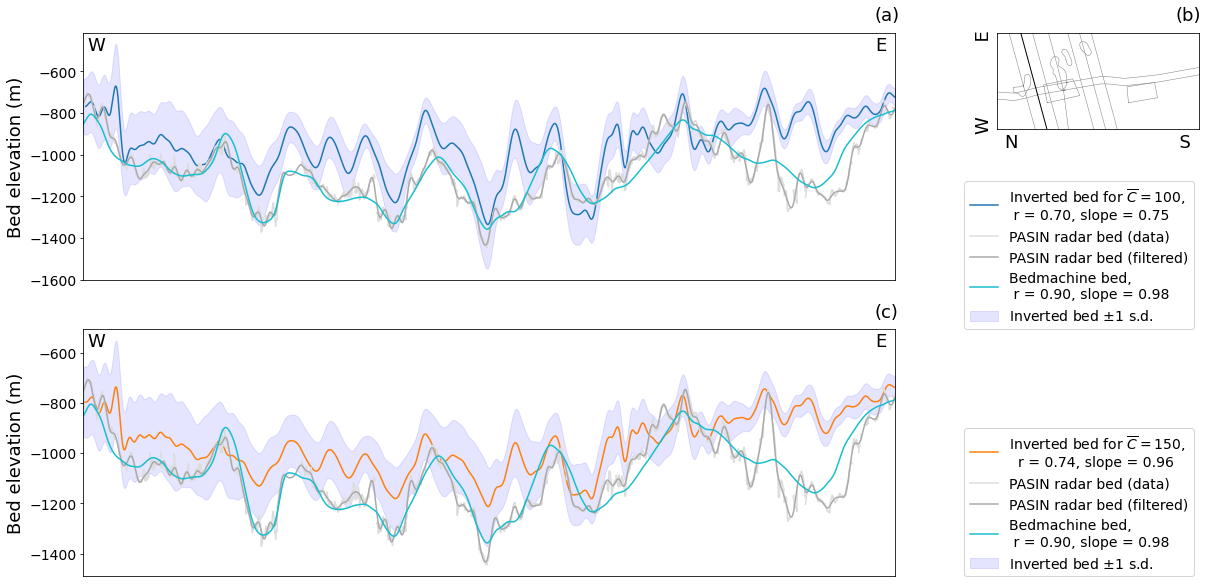

In [140]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(y_int_11b, Bed_int_11b_100-Errbed_int_11b_100, \
                   Bed_int_11b_100+Errbed_int_11b_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(y_int_11b, Bed_int_11b_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_11b_100, slope_Bed_11b_100))
ax[0,0].plot(y_11b, be_11b, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(y_int_11b, be_int_11b, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(y_int_11b, Bedmach_int_11b, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_11b, slope_BMach_11b))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(y_int_11b.min(), y_int_11b.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(y_int_11b, Bed_int_11b_150-Errbed_int_11b_150, \
                   Bed_int_11b_150+Errbed_int_11b_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(y_int_11b, Bed_int_11b_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_11b_150, slope_Bed_11b_150))
ax[1,0].plot(y_11b, be_11b, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(y_int_11b, be_int_11b, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(y_int_11b, Bedmach_int_11b, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_11b, slope_BMach_11b))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(y_int_11b.min(), y_int_11b.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 1, c= 'k', zorder = 100)
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
#plt.savefig('Flight_line_13b_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
#plt.savefig('Flight_line_13b_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [89]:
y_132_r = y_132[~np.isnan(be_132)]#.reset_index()['y']
x_132_r = x_132[~np.isnan(be_132)]#.reset_index()['x']
be_132_r = be_132[~np.isnan(be_132)]#.reset_index()['BedElev']
y_int = np.arange(y_132_r.max(), y_132_r.min()+10, -25)
x_int = griddata((y_132_r), x_132_r,(y_int), method = 'cubic')
be_int = griddata((y_132_r), be_132_r,(y_int), method = 'cubic')
grad = (be_int[0]- be_int[be_int.shape[0]-1])/(y_int[0]-y_int[y_int.shape[0]-1])
slope = np.arange(0,len(y_int)*25,25) * grad
wave_int = 1/np.abs(fftfreq(len(be_int), 25))
wave_int_mask = wave_int < filt_wave
be_fft = fft(be_int-slope)
be_fft[wave_int_mask] = 0
be_ifft = ifft(be_fft).real + slope
x_int_132, y_int_132, be_int_132 = x_int, y_int, be_ifft

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [141]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100
Bedmach_132 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_132,y_int_132), method = 'cubic')
Bed_132_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_132,y_int_132), method = 'cubic')
Errbed_132_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_132,y_int_132), method = 'cubic')
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150
Bed_132_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_132,y_int_132), method = 'cubic')
Errbed_132_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_132,y_int_132), method = 'cubic')

In [142]:
Bedmach_int_132 = fft_smooth(Bedmach_132, filt_wave)
Bed_int_132_100 = fft_smooth(Bed_132_100, filt_wave)
Bed_int_132_150 = fft_smooth(Bed_132_150, filt_wave)
Errbed_int_132_100 = fft_smooth(Errbed_132_100, filt_wave)
Errbed_int_132_150 = fft_smooth(Errbed_132_150, filt_wave)

Bed_132_100_reg = Bed_int_132_100[~np.isnan(be_int_132)][~np.isnan((Bed_132_100[~np.isnan(be_int_132)]))]
Bed_132_150_reg = Bed_int_132_150[~np.isnan(be_int_132)][~np.isnan((Bed_132_150[~np.isnan(be_int_132)]))]
be_132_reg = be_int_132[~np.isnan(be_int_132)][~np.isnan((Bed_132_100[~np.isnan(be_int_132)]))]
Bedmach_132_reg = Bedmach_int_132[~np.isnan(be_int_132)][~np.isnan((Bed_132_100[~np.isnan(be_int_132)]))]

slope_Bed_132_100, intercept_Bed_132_100, r_value_Bed_132_100 = regr_coe2f(Bed_132_100_reg, be_132_reg)
slope_Bed_132_150, intercept_Bed_132_150, r_value_Bed_132_150 = regr_coe2f(Bed_132_150_reg, be_132_reg)
slope_BMach_132, intercept_BMach_132, r_value_BMach_132 = regr_coe2f(Bedmach_132_reg, be_132_reg)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


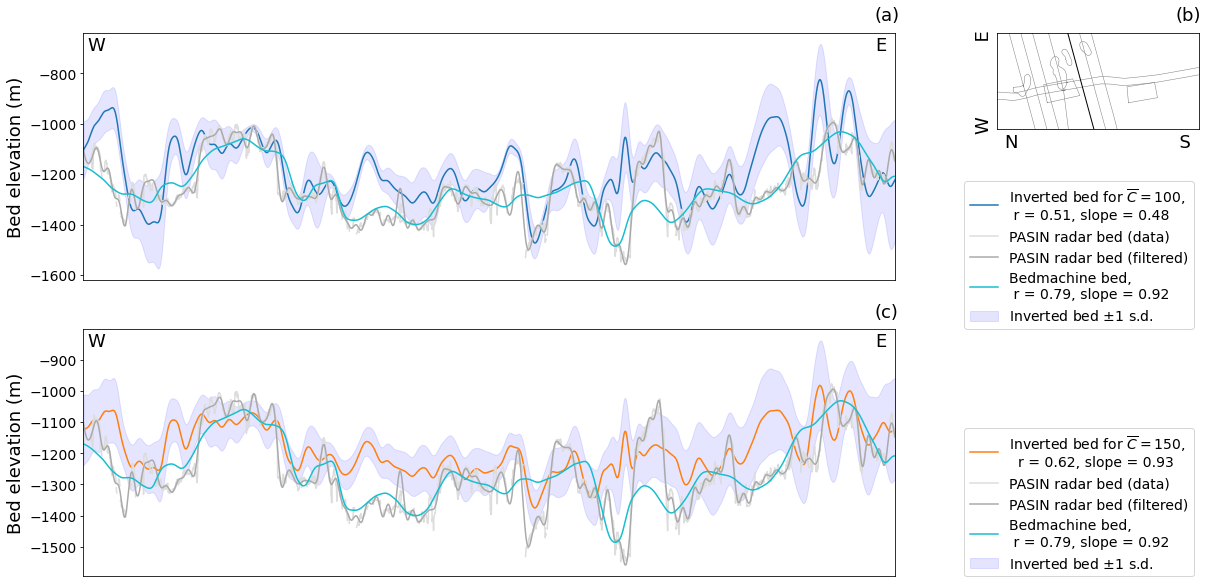

In [143]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(y_int_132, Bed_int_132_100-Errbed_int_132_100, \
                   Bed_int_132_100+Errbed_int_132_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(y_int_132, Bed_int_132_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_132_100, slope_Bed_132_100))
ax[0,0].plot(y_132, be_132, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(y_int_132, be_int_132, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(y_int_132, Bedmach_int_132, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_132, slope_BMach_132))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(y_int_132.min(), y_int_132.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(y_int_132, Bed_int_132_150-Errbed_int_132_150, \
                   Bed_int_132_150+Errbed_int_132_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(y_int_132, Bed_int_132_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_132_150, slope_Bed_132_150))
ax[1,0].plot(y_132, be_132, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(y_int_132, be_int_132, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(y_int_132, Bedmach_int_132, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_132, slope_BMach_132))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(y_int_132.min(), y_int_132.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 1, c= 'k', zorder = 100)
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
#plt.savefig('Flight_line_13b_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
#plt.savefig('Flight_line_13b_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [90]:
y_13a_r = y_13a[~np.isnan(be_13a)].reset_index()['y']
x_13a_r = x_13a[~np.isnan(be_13a)].reset_index()['x']
be_13a_r = be_13a[~np.isnan(be_13a)].reset_index()['BedElev']
y_int = np.arange(y_13a_r.max(), y_13a_r.min()+10, -25)
x_int = griddata((y_13a_r), x_13a_r,(y_int), method = 'cubic')
be_int = griddata((y_13a_r), be_13a_r,(y_int), method = 'cubic')
grad = (be_int[0]- be_int[be_int.shape[0]-1])/(y_int[0]-y_int[y_int.shape[0]-1])
slope = np.arange(0,len(y_int)*25,25) * grad
wave_int = 1/np.abs(fftfreq(len(be_int), 25))
wave_int_mask = wave_int < filt_wave
be_fft = fft(be_int-slope)
be_fft[wave_int_mask] = 0
be_ifft = ifft(be_fft).real + slope
x_int_13a, y_int_13a, be_int_13a = x_int, y_int, be_ifft

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [144]:
bed_flat = bed_flat_100
errbed_flat = errbed_flat_100
Bedmach_13a = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bedmach_flat[~np.isnan(bed_flat)],\
                        (x_int_13a,y_int_13a), method = 'cubic')
Bed_13a_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_13a,y_int_13a), method = 'cubic')
Errbed_13a_100 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_13a,y_int_13a), method = 'cubic')
bed_flat = bed_flat_150
errbed_flat = errbed_flat_150
Bed_13a_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),bed_flat[~np.isnan(bed_flat)],\
                        (x_int_13a,y_int_13a), method = 'cubic')
Errbed_13a_150 = griddata((x_flat[~np.isnan(bed_flat)],y_flat[~np.isnan(bed_flat)]),errbed_flat[~np.isnan(bed_flat)],\
                        (x_int_13a,y_int_13a), method = 'cubic')

In [147]:
Bedmach_int_13a = fft_smooth(Bedmach_13a, filt_wave)
Bed_int_13a_100 = fft_smooth(Bed_13a_100, filt_wave)
Bed_int_13a_150 = fft_smooth(Bed_13a_150, filt_wave)
Errbed_int_13a_100 = fft_smooth(Errbed_13a_100, filt_wave)
Errbed_int_13a_150 = fft_smooth(Errbed_13a_150, filt_wave)

Bed_13a_100_reg = Bed_int_13a_100[~np.isnan(be_int_13a)][~np.isnan((Bed_13a_100[~np.isnan(be_int_13a)]))]
Bed_13a_150_reg = Bed_int_13a_150[~np.isnan(be_int_13a)][~np.isnan((Bed_13a_150[~np.isnan(be_int_13a)]))]
be_13a_reg = be_int_13a[~np.isnan(be_int_13a)][~np.isnan((Bed_13a_100[~np.isnan(be_int_13a)]))]
Bedmach_13a_reg = Bedmach_int_13a[~np.isnan(be_int_13a)][~np.isnan((Bed_13a_100[~np.isnan(be_int_13a)]))]

slope_Bed_13a_100, intercept_Bed_13a_100, r_value_Bed_13a_100 = regr_coe2f(Bed_13a_100_reg, be_13a_reg)
slope_Bed_13a_150, intercept_Bed_13a_150, r_value_Bed_13a_150 = regr_coe2f(Bed_13a_150_reg, be_13a_reg)
slope_BMach_13a, intercept_BMach_13a, r_value_BMach_13a = regr_coe2f(Bedmach_13a_reg, be_13a_reg)

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


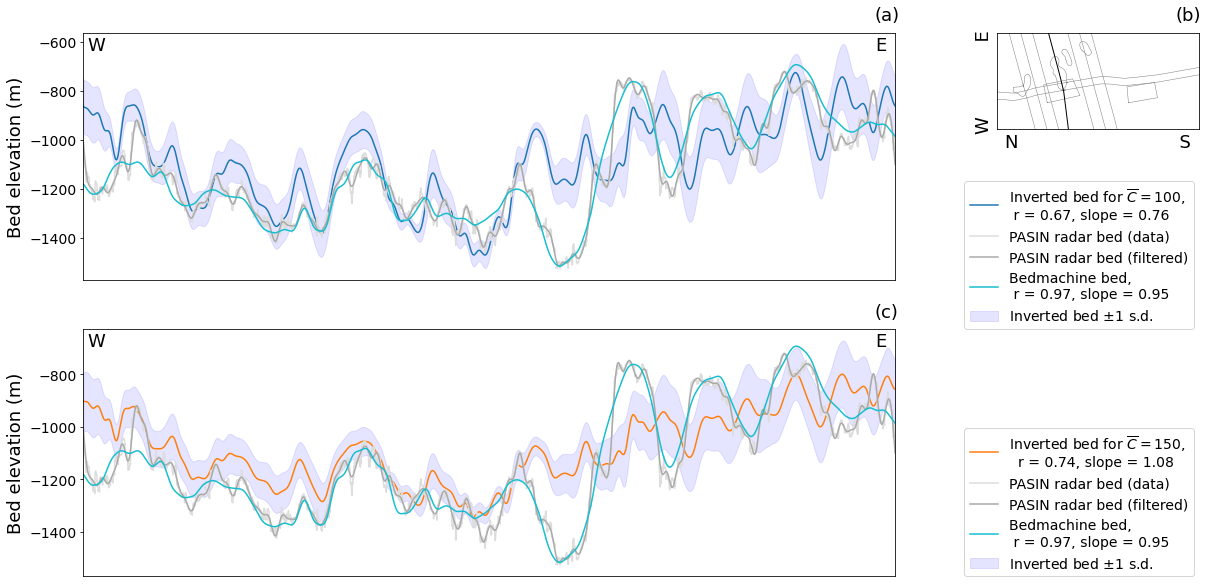

In [148]:
fig, ax = plt.subplots(2,2,figsize = (20,10), gridspec_kw={'width_ratios': [4, 1]})
ax[0,0].fill_between(y_int_13a, Bed_int_13a_100-Errbed_int_13a_100, \
                   Bed_int_13a_100+Errbed_int_13a_100, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[0,0].plot(y_int_13a, Bed_int_13a_100, c = 'C0',\
           label = 'Inverted bed for $\overline{{C}} = 100$, \n r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_13a_100, slope_Bed_13a_100))
ax[0,0].plot(y_13a, be_13a, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[0,0].plot(y_int_13a, be_int_13a, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[0,0].plot(y_int_13a, Bedmach_int_13a, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}'\
             .format(r_value_BMach_13a, slope_BMach_13a))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[0,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[0,0].get_xaxis().set_ticks([]);
ax[0,0].legend(loc = (1.085, -0.2), fontsize = 14)
ax[0,0].set_xlim(y_int_13a.min(), y_int_13a.max())
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(a)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
ax[0,0].annotate('(b)', xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

ax[1,0].fill_between(y_int_13a, Bed_int_13a_150-Errbed_int_13a_150, \
                   Bed_int_13a_150+Errbed_int_13a_150, color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
ax[1,0].plot(y_int_13a, Bed_int_13a_150, c = 'C1',\
           label = 'Inverted bed for $\overline{{C}} = 150$, \n  r = {:.2f}, slope = {:.2f}' \
           .format(r_value_Bed_13a_150, slope_Bed_13a_150))
ax[1,0].plot(y_13a, be_13a, label = 'PASIN radar bed (data)', c = '#dddddd')
ax[1,0].plot(y_int_13a, be_int_13a, label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
#ax[0].scatter(x_int_91a, Bed_int_91a, c = Errbed_int_91a, cmap = 'coolwarm', \
#              label = 'Inverted bed, r = {:.2f}'.format(r_value_Bed_91a))
ax[1,0].plot(y_int_13a, Bedmach_int_13a, c = 'C9', \
        label = 'Bedmachine bed, \n r = {:.2f}, slope = {:.2f}' \
             .format(r_value_BMach_13a, slope_BMach_13a))
#ax[0].set_title('Flight lines 9 and 10 (West)', fontsize = 20)
ax[1,0].set_ylabel('Bed elevation (m)', fontsize = 18)
ax[1,0].get_xaxis().set_ticks([]);
ax[1,0].legend(loc = (1.085, 0), fontsize = 14)
ax[1,0].set_xlim(y_int_13a.min(), y_int_13a.max())
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].annotate('W', xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('E', xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
ax[1,0].annotate('(c)', xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)

groundinglineM.plot(ax=ax[0,1], facecolor='none')
ax[0,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
ax[0,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
ax[0,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
ax[0,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
ax[0,1].get_xaxis().set_ticks([]); ax[0,1].get_yaxis().set_ticks([]);
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 1, c= 'k', zorder = 100)
ax[0,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
ax[0,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
ax[0,1].set_xlabel('N                            S', fontsize = 18)
ax[0,1].set_ylabel('W             E', fontsize = 18)
ax[0,1].set_anchor('N')

ax[1,1].set_axis_off()
#ax[1].set_position([0.75,0.34,0.89,0.66])
#plt.tight_layout()
#plt.legend(loc = (1.05,0), fontsize = 18)
#plt.savefig('Flight_line_13b_x2.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
#plt.savefig('Flight_line_13b_x2.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [ ]:
# Plot the extra radar lines for C = 100

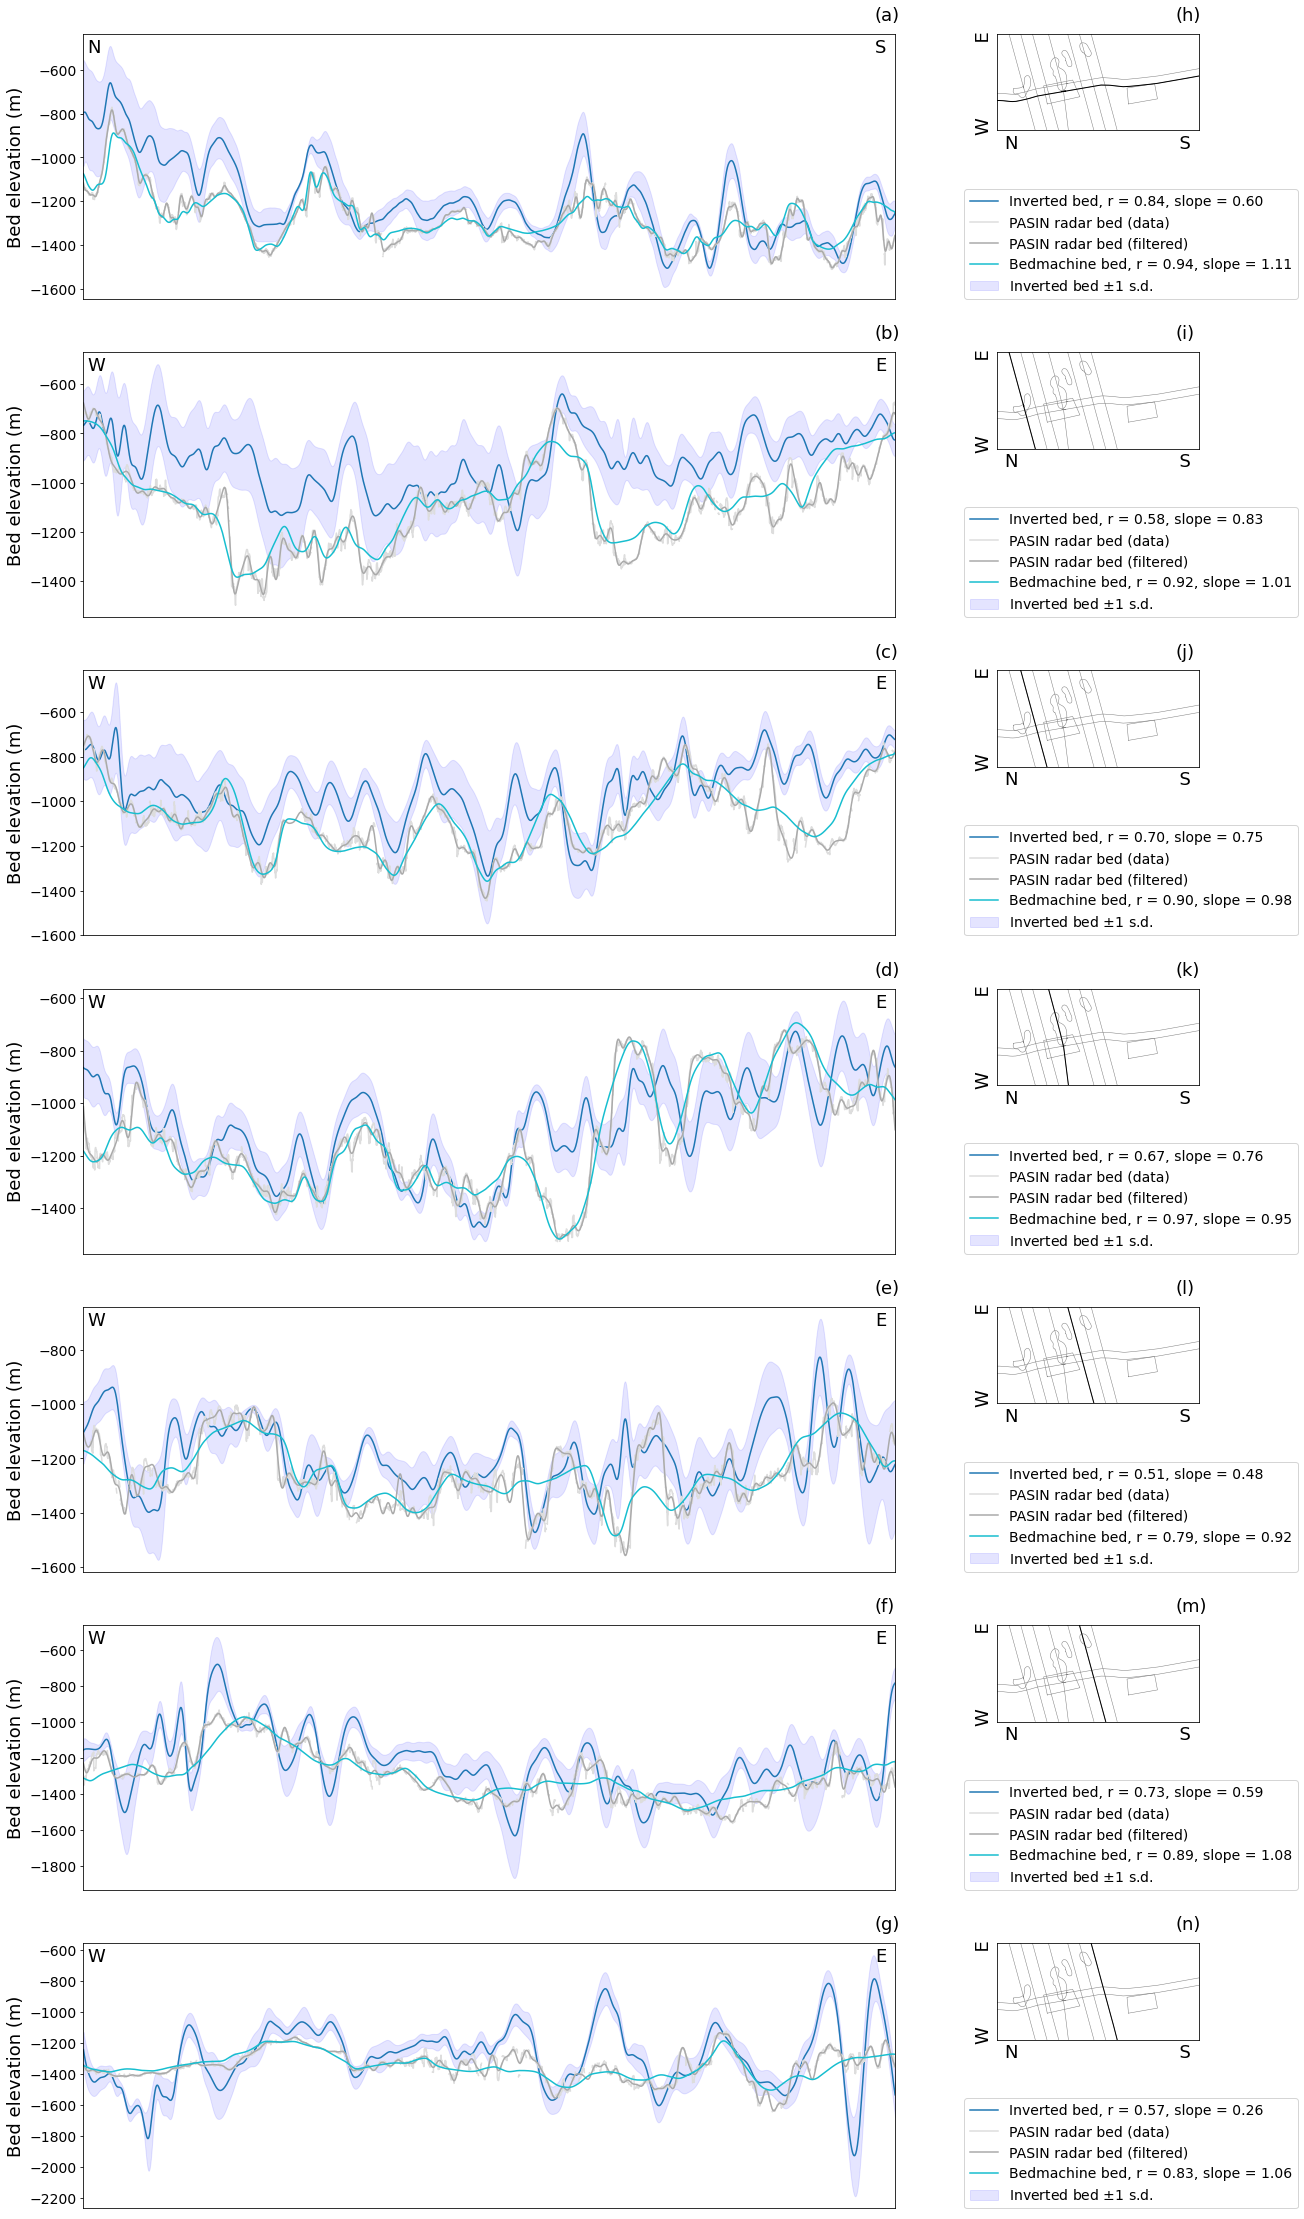

In [149]:
fig, ax = plt.subplots(7,2,figsize = (20,40), gridspec_kw={'width_ratios': [4, 1]})
x_or_y = [x_int_91b, y_int_11a, y_int_11b, y_int_13a, y_int_132, y_int_12a, y_int_12b]
x_or_y_orig = [x_91b, y_11a, y_11b, y_13a, y_132, y_12a, y_12b]
radar_orig = [be_91b, be_11a, be_11b, be_13a, be_132, be_12a, be_12b]
radar = [be_int_91b, be_int_11a, be_int_11b, be_int_13a, be_int_132, be_int_12a, be_int_12b]
Bed_int = [Bed_int_91b_100, Bed_int_11a_100, Bed_int_11b_100, Bed_int_13a_100, 
           Bed_int_132_100, Bed_int_12a_100, Bed_int_12b_100]
Bedmach_int = [Bedmach_int_91b, Bedmach_int_11a, Bedmach_int_11b, Bedmach_int_13a, 
               Bedmach_int_132, Bedmach_int_12a, Bedmach_int_12b]
Errbed_int = [Errbed_int_91b_100, Errbed_int_11a_100, Errbed_int_11b_100, 
              Errbed_int_13a_100, Errbed_int_132_100, 
             Errbed_int_12a_100, Errbed_int_12b_100]
r_val = [r_value_Bed_91b_100, r_value_Bed_11a_100, r_value_Bed_11b_100, 
         r_value_Bed_13a_100, r_value_Bed_132_100,
          r_value_Bed_12a_100, r_value_Bed_12b_100]
slope_val = [slope_Bed_91b_100, slope_Bed_11a_100, slope_Bed_11b_100, 
             slope_Bed_13a_100, slope_Bed_132_100,
             slope_Bed_12a_100, slope_Bed_12b_100]
r_val_bmach = [r_value_BMach_91b, r_value_BMach_11a, r_value_BMach_11b, r_value_BMach_13a, 
               r_value_BMach_132, r_value_BMach_12a, r_value_BMach_12b]
slope_bmach = [slope_BMach_91b, slope_BMach_11a, slope_BMach_11b, slope_BMach_13a, slope_BMach_132,
             slope_BMach_12a, slope_BMach_12b]
end_left = ['N','W','W','W','W','W','W']
end_right = ['S','E','E','E','E','E','E']
plt_labels1 = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
plt_labels2 = ['(h)','(i)','(j)','(k)','(l)','(m)','(n)']

for i in range(7):
    ax[i,0].fill_between(x_or_y[i], Bed_int[i]-Errbed_int[i], \
                   Bed_int[i]+Errbed_int[i], color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
    ax[i,0].plot(x_or_y[i], Bed_int[i], c = 'C0',\
           label = 'Inverted bed, r = {:.2f}, slope = {:.2f}'.format(r_val[i], slope_val[i]))
    ax[i,0].plot(x_or_y_orig[i], radar_orig[i], label = 'PASIN radar bed (data)', c = '#dddddd')
    ax[i,0].plot(x_or_y[i], radar[i], label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
    ax[i,0].plot(x_or_y[i], Bedmach_int[i], c = 'C9', \
        label = 'Bedmachine bed, r = {:.2f}, slope = {:.2f}'.format(r_val_bmach[i], slope_bmach[i]))
    ax[i,0].legend(loc = (1.085, 0), fontsize = 14)
    ax[i,0].set_ylabel('Bed elevation (m)', fontsize = 18)
    ax[i,0].get_xaxis().set_ticks([]);
    ax[i,0].set_xlim(x_or_y[i].min(), x_or_y[i].max())
    ax[i,0].tick_params(axis='both', which='major', labelsize=14)
    ax[i,0].annotate(end_left[i], xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
    ax[i,0].annotate(end_right[i], xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
    ax[i,0].annotate(plt_labels1[i], xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
    ax[i,0].annotate(plt_labels2[i], xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

    groundinglineM.plot(ax=ax[i,1], facecolor='none')
    ax[i,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
    ax[i,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
    ax[i,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
    ax[i,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
    ax[i,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
    ax[i,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
    ax[i,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
    ax[i,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
    ax[i,1].get_xaxis().set_ticks([]); ax[i,1].get_yaxis().set_ticks([]);
    ax[i,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
    ax[i,1].set_xlabel('N                            S', fontsize = 18)
    ax[i,1].set_ylabel('W             E', fontsize = 18)
    ax[i,1].set_anchor('N')

    
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 1, c= 'k', zorder = 10)
ax[1,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 1, c= 'k', zorder = 10)
ax[2,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 1, c= 'k', zorder = 10)
ax[3,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 1, c= 'k', zorder = 10)
ax[4,1].plot(x_132, y_132, label = 'Flight line 12/13',    linewidth = 1, c= 'k', zorder = 10)
ax[5,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 1, c= 'k', zorder = 10)
ax[6,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 1, c= 'k', zorder = 10)
    
    
plt.savefig('Flight_lines_extra.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
plt.savefig('Flight_lines_extra.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [ ]:
## Plot the extra radar lines for C = 150

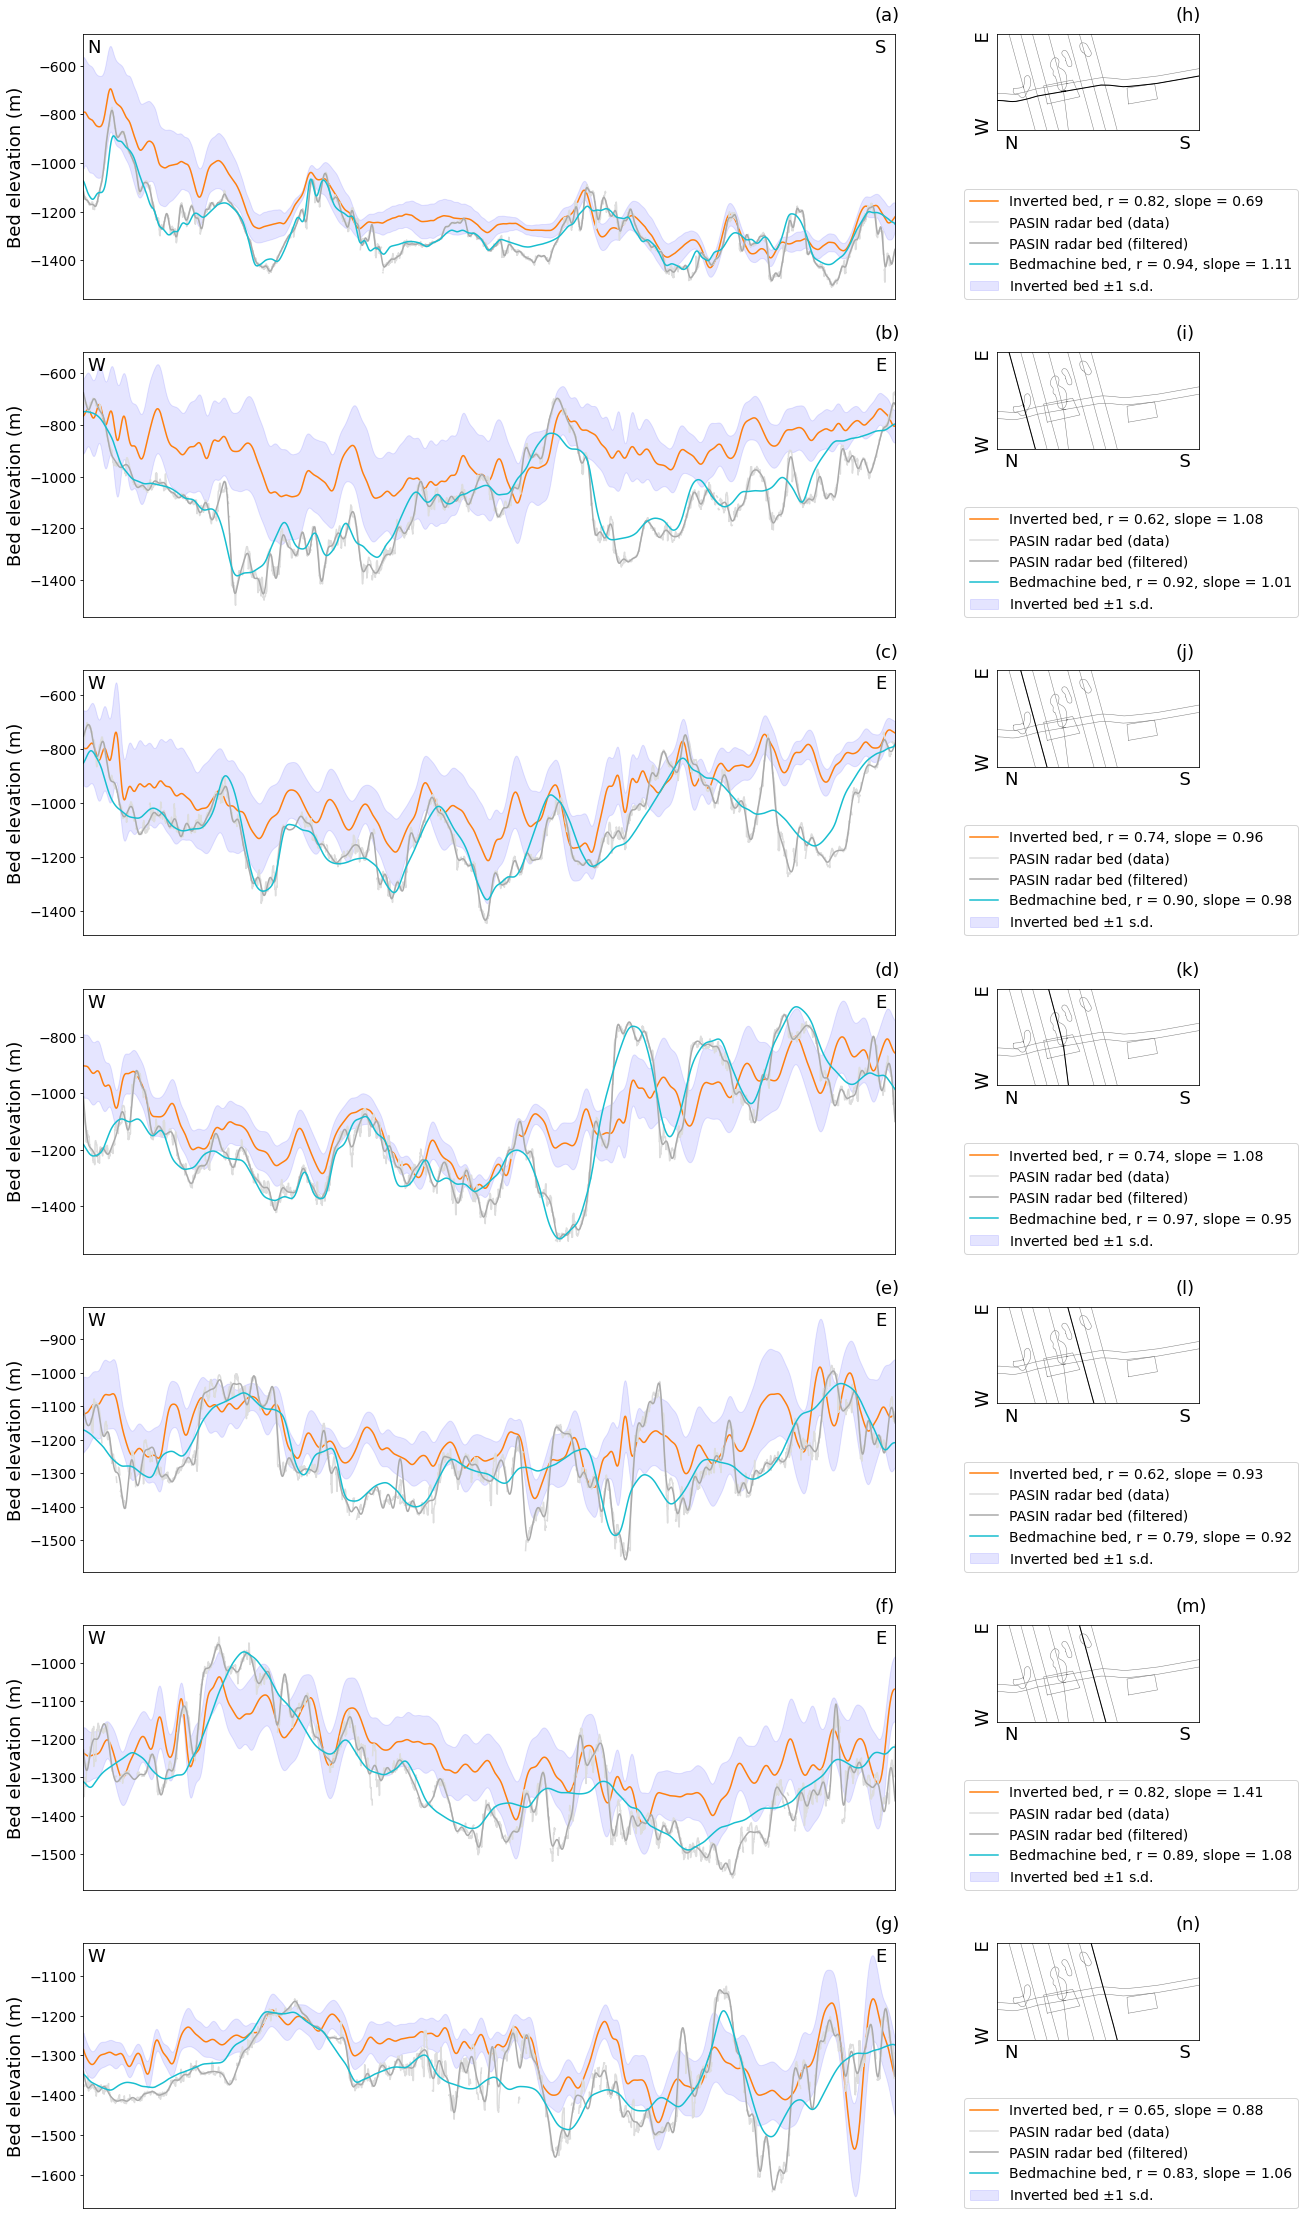

In [151]:
fig, ax = plt.subplots(7,2,figsize = (20,40), gridspec_kw={'width_ratios': [4, 1]})
x_or_y = [x_int_91b, y_int_11a, y_int_11b, y_int_13a, y_int_132, y_int_12a, y_int_12b]
x_or_y_orig = [x_91b, y_11a, y_11b, y_13a, y_132, y_12a, y_12b]
radar_orig = [be_91b, be_11a, be_11b, be_13a, be_132, be_12a, be_12b]
radar = [be_int_91b, be_int_11a, be_int_11b, be_int_13a, be_int_132, be_int_12a, be_int_12b]
Bed_int = [Bed_int_91b_150, Bed_int_11a_150, Bed_int_11b_150, Bed_int_13a_150, 
           Bed_int_132_150, Bed_int_12a_150, Bed_int_12b_150]
Bedmach_int = [Bedmach_int_91b, Bedmach_int_11a, Bedmach_int_11b, Bedmach_int_13a, 
               Bedmach_int_132, Bedmach_int_12a, Bedmach_int_12b]
Errbed_int = [Errbed_int_91b_150, Errbed_int_11a_150, Errbed_int_11b_150, 
              Errbed_int_13a_150, Errbed_int_132_150, 
             Errbed_int_12a_150, Errbed_int_12b_150]
r_val = [r_value_Bed_91b_150, r_value_Bed_11a_150, r_value_Bed_11b_150, 
         r_value_Bed_13a_150, r_value_Bed_132_150,
          r_value_Bed_12a_150, r_value_Bed_12b_150]
slope_val = [slope_Bed_91b_150, slope_Bed_11a_150, slope_Bed_11b_150, 
             slope_Bed_13a_150, slope_Bed_132_150,
             slope_Bed_12a_150, slope_Bed_12b_150]
r_val_bmach = [r_value_BMach_91b, r_value_BMach_11a, r_value_BMach_11b, r_value_BMach_13a, 
               r_value_BMach_132, r_value_BMach_12a, r_value_BMach_12b]
slope_bmach = [slope_BMach_91b, slope_BMach_11a, slope_BMach_11b, slope_BMach_13a, slope_BMach_132,
             slope_BMach_12a, slope_BMach_12b]
end_left = ['N','W','W','W','W','W','W']
end_right = ['S','E','E','E','E','E','E']
plt_labels1 = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
plt_labels2 = ['(h)','(i)','(j)','(k)','(l)','(m)','(n)']

for i in range(7):
    ax[i,0].fill_between(x_or_y[i], Bed_int[i]-Errbed_int[i], \
                   Bed_int[i]+Errbed_int[i], color = 'b', alpha = 0.1, \
                  label = 'Inverted bed $\pm 1 $ s.d.')
    ax[i,0].plot(x_or_y[i], Bed_int[i], c = 'C1',\
           label = 'Inverted bed, r = {:.2f}, slope = {:.2f}'.format(r_val[i], slope_val[i]))
    ax[i,0].plot(x_or_y_orig[i], radar_orig[i], label = 'PASIN radar bed (data)', c = '#dddddd')
    ax[i,0].plot(x_or_y[i], radar[i], label = 'PASIN radar bed (filtered)', c = '#aaaaaa')
    ax[i,0].plot(x_or_y[i], Bedmach_int[i], c = 'C9', \
        label = 'Bedmachine bed, r = {:.2f}, slope = {:.2f}'.format(r_val_bmach[i], slope_bmach[i]))
    ax[i,0].legend(loc = (1.085, 0), fontsize = 14)
    ax[i,0].set_ylabel('Bed elevation (m)', fontsize = 18)
    ax[i,0].get_xaxis().set_ticks([]);
    ax[i,0].set_xlim(x_or_y[i].min(), x_or_y[i].max())
    ax[i,0].tick_params(axis='both', which='major', labelsize=14)
    ax[i,0].annotate(end_left[i], xy = (0.005,0.93), xycoords = 'axes fraction', fontsize = 18)
    ax[i,0].annotate(end_right[i], xy = (0.975,0.93), xycoords = 'axes fraction', fontsize = 18)
    ax[i,0].annotate(plt_labels1[i], xy = (0.975,1.05), xycoords = 'axes fraction', fontsize = 18)
    ax[i,0].annotate(plt_labels2[i], xy = (1.345,1.05), xycoords = 'axes fraction', fontsize = 18)

    groundinglineM.plot(ax=ax[i,1], facecolor='none')
    ax[i,1].plot(*(x0,y0), color = 'grey', linewidth = 0.5)
    ax[i,1].plot(*(x1,y1), color = 'grey', linewidth = 0.5)
    ax[i,1].plot(*(x2,y2), color = 'grey', linewidth = 0.5)
    ax[i,1].plot(*(x3,y3), color = 'grey', linewidth = 0.5)
    ax[i,1].plot(*poly.exterior.xy, color='grey', linewidth = 0.5)
    ax[i,1].plot(*poly2.exterior.xy, color='grey', linewidth = 0.5)
    ax[i,1].set_xlim(np.min(poly_data.exterior.xy[0]), np.max(poly_data.exterior.xy[0]))
    ax[i,1].set_ylim(np.min(poly_data.exterior.xy[1]), np.max(poly_data.exterior.xy[1]))
    ax[i,1].get_xaxis().set_ticks([]); ax[i,1].get_yaxis().set_ticks([]);
    ax[i,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_91a,y_91a, label = 'Flight line 9/10 East', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_13b, y_13b, label = 'Flight line 13 North', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_132, y_132, label = 'Flight line 12/13', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 0.5, c= 'grey')
    ax[i,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 0.5, c= 'grey')
    ax[i,1].set_xlabel('N                            S', fontsize = 18)
    ax[i,1].set_ylabel('W             E', fontsize = 18)
    ax[i,1].set_anchor('N')

    
ax[0,1].plot(x_91b,y_91b, label = 'Flight line 9/10 West', linewidth = 1, c= 'k', zorder = 10)
ax[1,1].plot(x_11a, y_11a, label = 'Flight line 11 North', linewidth = 1, c= 'k', zorder = 10)
ax[2,1].plot(x_11b, y_11b, label = 'Flight line 11 South', linewidth = 1, c= 'k', zorder = 10)
ax[3,1].plot(x_13a, y_13a, label = 'Flight line 13 South', linewidth = 1, c= 'k', zorder = 10)
ax[4,1].plot(x_132, y_132, label = 'Flight line 12/13',    linewidth = 1, c= 'k', zorder = 10)
ax[5,1].plot(x_12a, y_12a, label = 'Flight line 12 North', linewidth = 1, c= 'k', zorder = 10)
ax[6,1].plot(x_12b, y_12b, label = 'Flight line 12 South', linewidth = 1, c= 'k', zorder = 10)
    
    
plt.savefig('Flight_lines_extra.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
plt.savefig('Flight_lines_extra.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')